# Task 2 

## Credit / Home Loans - AutoML vs Bespoke ML

Standard Bank is embracing the digital transformation wave and intends to use new and exciting technologies to give their customers a complete set of services from the convenience of their mobile devices.
As Africa’s biggest lender by assets, the bank aims to improve the current process in which potential borrowers apply for a home loan. The current process involves loan officers having to manually process home loan applications. This process takes 2 to 3 days to process upon which the applicant will receive communication on whether or not they have been granted the loan for the requested amount.
To improve the process Standard Bank wants to make use of machine learning to assess the credit worthiness of an applicant by implementing a model that will predict if the potential borrower will default on his/her loan or not, and do this such that the applicant receives a response immediately after completing their application. 

You will be required to follow the data science lifecycle to fulfill the objective. The data science lifecycle (https://www.datascience-pm.com/crisp-dm-2/) includes:

- Business Understanding
- Data Understanding
- Data Preparation
- Modelling
- Evaluation
- Deployment.

You now know the CRoss Industry Standard Process for Data Mining (CRISP-DM), have an idea of the business needs and objectivess, and understand the data. Next is the tedious task of preparing the data for modeling, modeling and evaluating the model. Luckily, just like EDA the first of the two phases can be automated. But also, just like EDA this is not always best. 


In this task you will be get a taste of AutoML and Bespoke ML. In the notebook we make use of the library auto-sklearn/autosklearn (https://www.automl.org/automl/auto-sklearn/) for AutoML and sklearn for ML. We will use train one machine for the traditional approach and you will be required to change this model to any of the models that exist in sklearn. The model we will train will be a Logistic Regression. Parts of the data preparation will be omitted for you to do, but we will provide hints to lead you in the right direction.

The data provided can be found in the Resources folder as well as (https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset).

- train will serve as the historical dataset that the model will be trained on and,
- test will serve as unseen data we will predict on, i.e. new ('future') applicants.

### Part One

There are many AutoEDA Python libraries out there which include:

- dtale (https://dtale.readthedocs.io/en/latest/)
- pandas profiling (https://pandas-profiling.ydata.ai/docs/master/index.html)
- autoviz (https://readthedocs.org/projects/autoviz/)
- sweetviz (https://pypi.org/project/sweetviz/)

and many more. In this task we will use Sweetviz.. You may be required to use bespoke EDA methods.

The Home Loans Department manager wants to know the following:

1. An overview of the data. (HINT: Provide the number of records, fields and their data types. Do for both).

2. What data quality issues exist in both train and test? (HINT: Comment any missing values and duplicates)

3. How do the the loan statuses compare? i.e. what is the distrubition of each?

4. How do women and men compare when it comes to defaulting on loans in the historical dataset?

5. How many of the loan applicants have dependents based on the historical dataset?

6. How do the incomes of those who are employed compare to those who are self employed based on the historical dataset? 

7. Are applicants with a credit history more likely to default than those who do not have one?

8. Is there a correlation between the applicant's income and the loan amount they applied for? 

### Part Two

Run the AutoML section and then fill in code for the traditional ML section for the the omitted cells.

Please note that the notebook you submit must include the analysis you did in Task 2.













## Import Libraries




In [526]:
# !pip install sweetviz 
#uncomment the above if you need to install the library 
# !pip install auto-sklearn
#uncomment the above if you need to install the library 

In [527]:
# !pip install --upgrade scipy

In [528]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [529]:
import warnings
warnings.filterwarnings('ignore')

## Import Datasets

In [530]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [531]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [532]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

# Part One

## EDA

In [533]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [534]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [535]:
# we concat for easy analysis
n = train.shape[0] # we set this to be able to separate the
df = pd.concat([train, test], axis=0)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Sweetviz

                                             |                                             | [  0%]   00:00 ->…


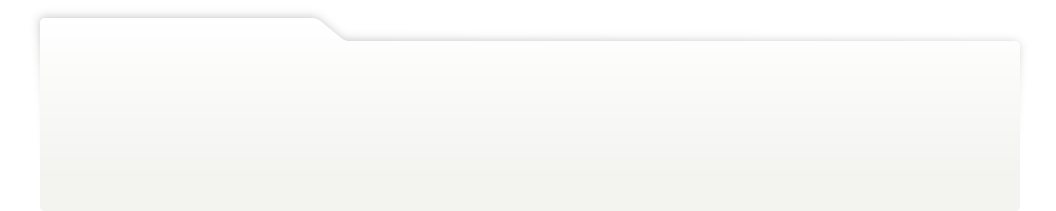
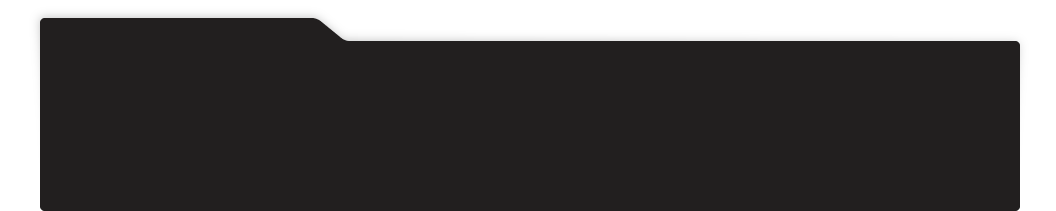
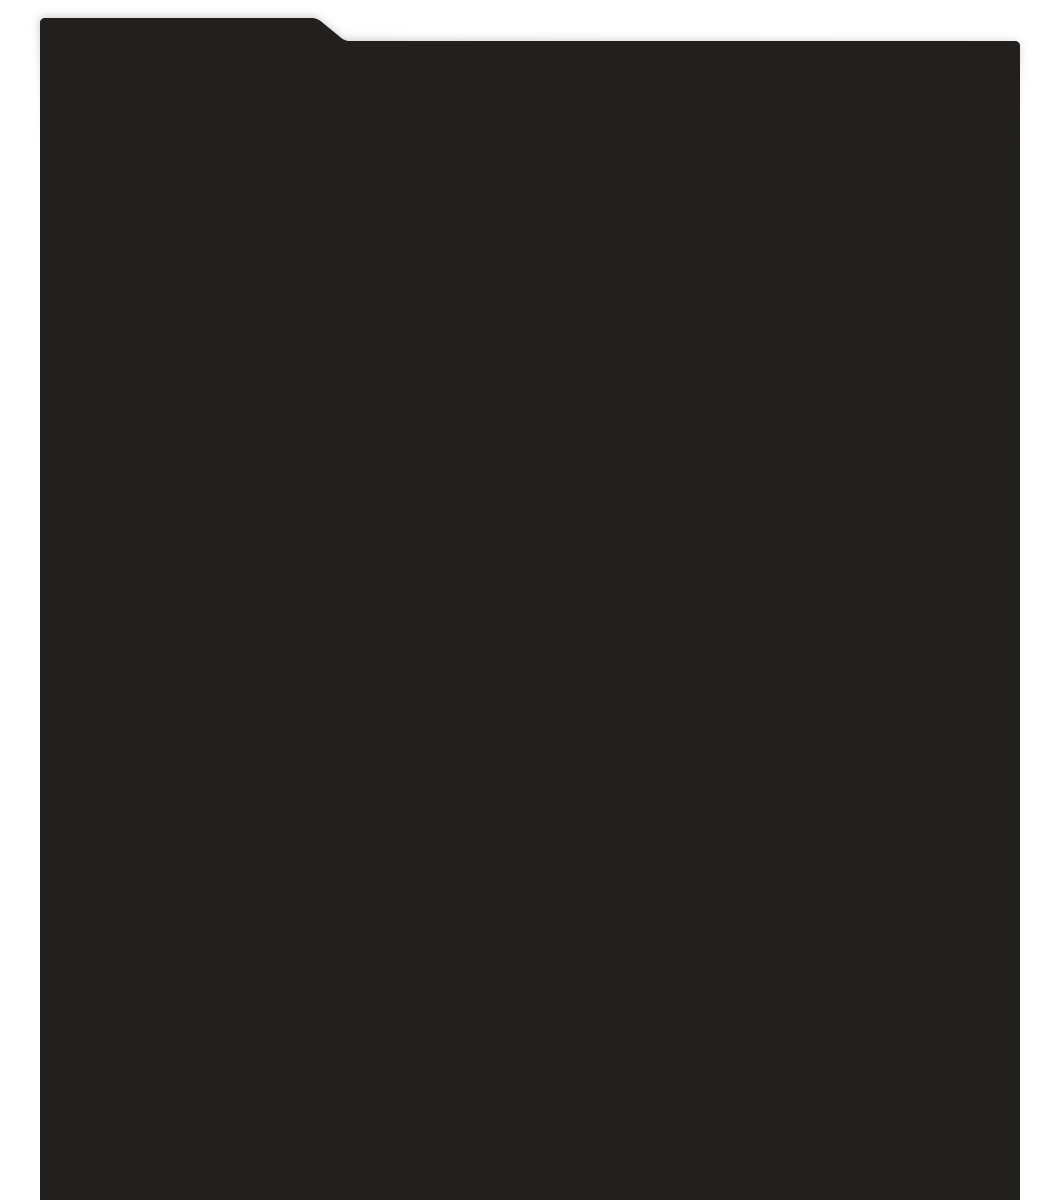
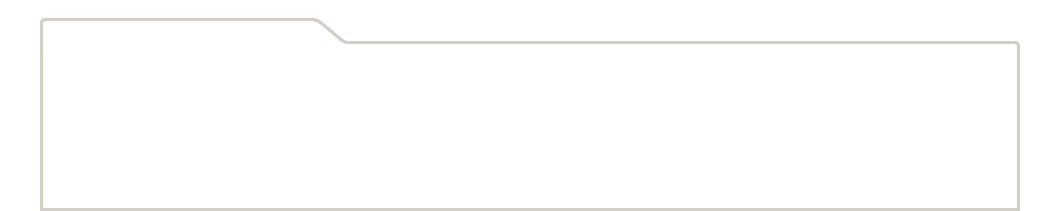
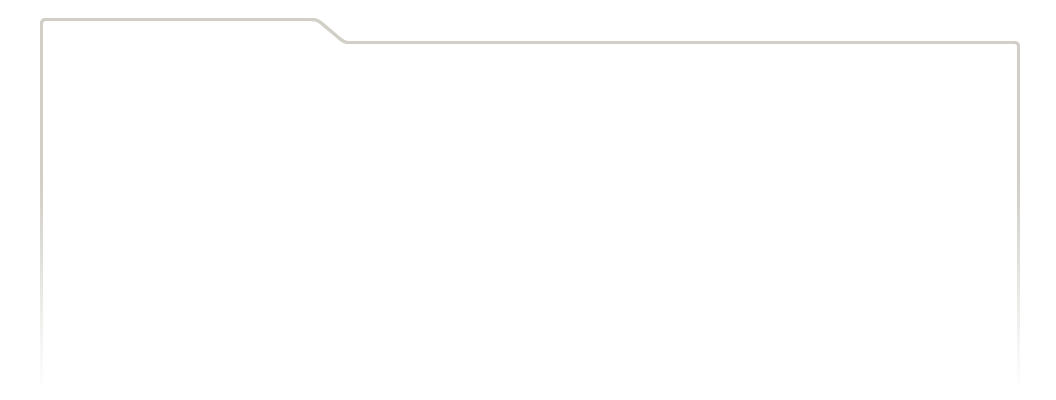
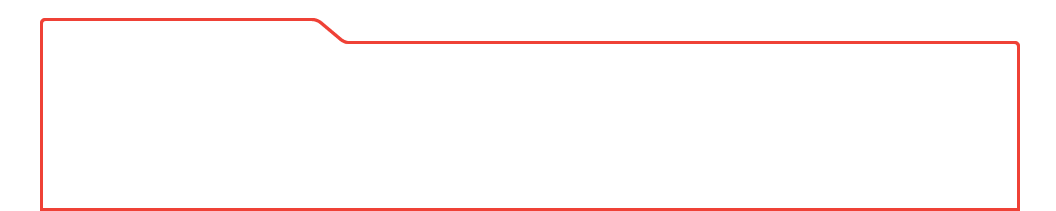
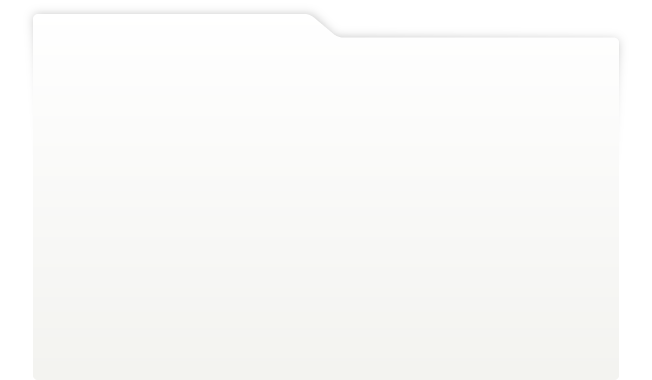
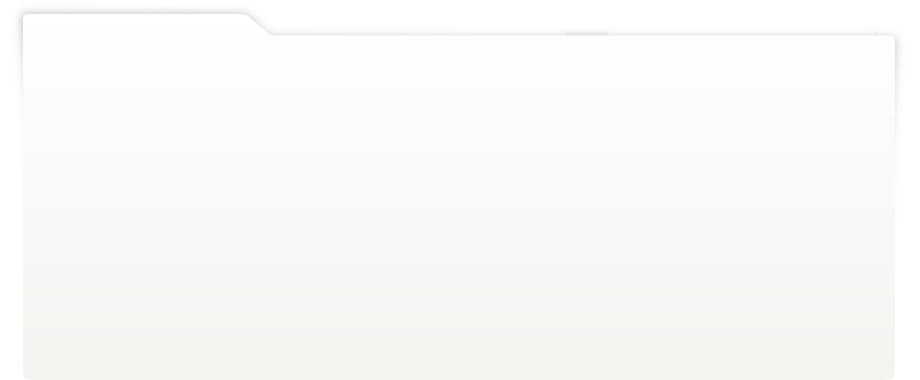
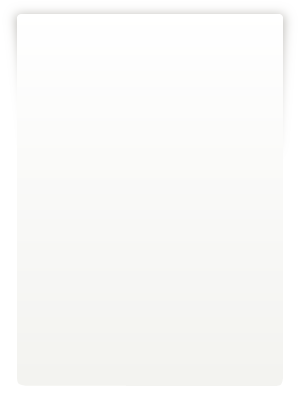
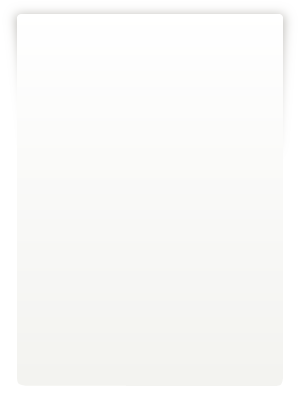
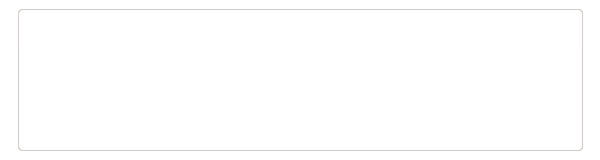
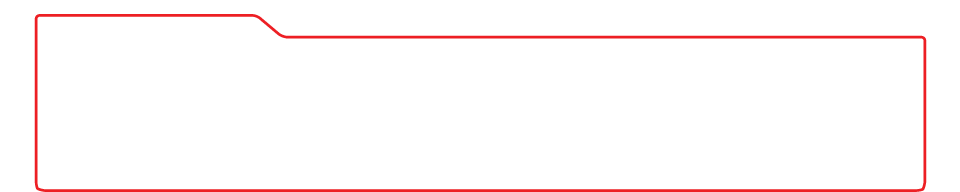
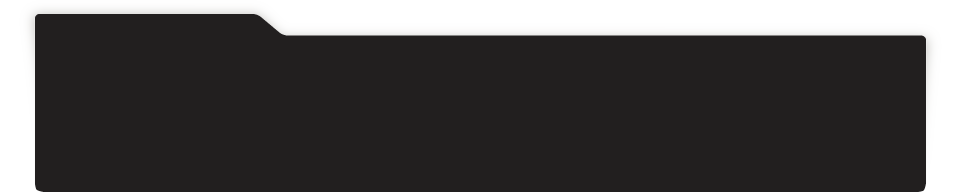
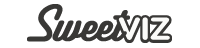
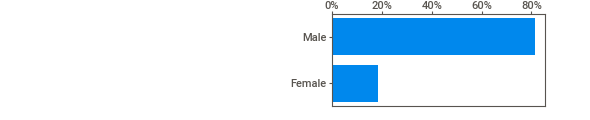
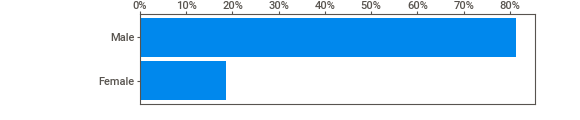
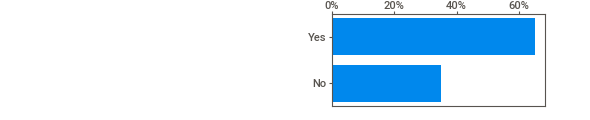
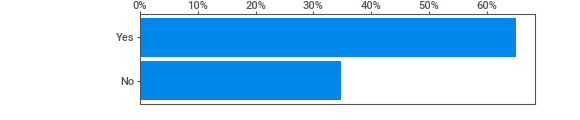
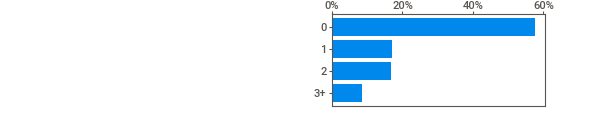
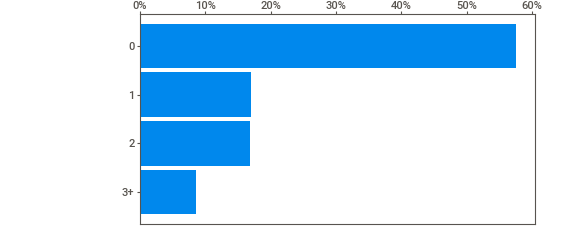
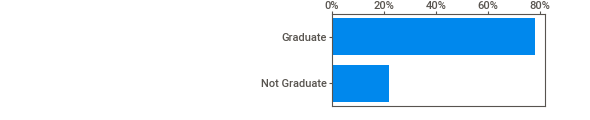
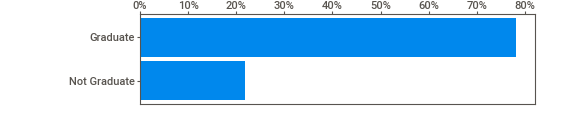
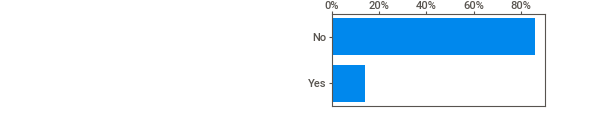
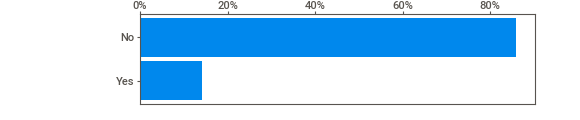
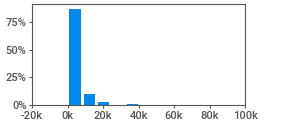
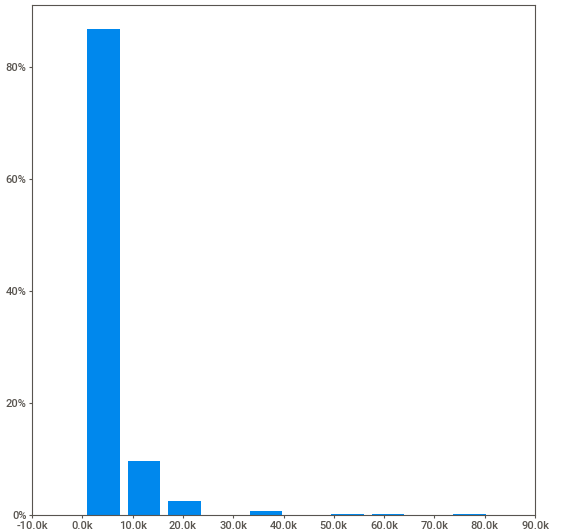
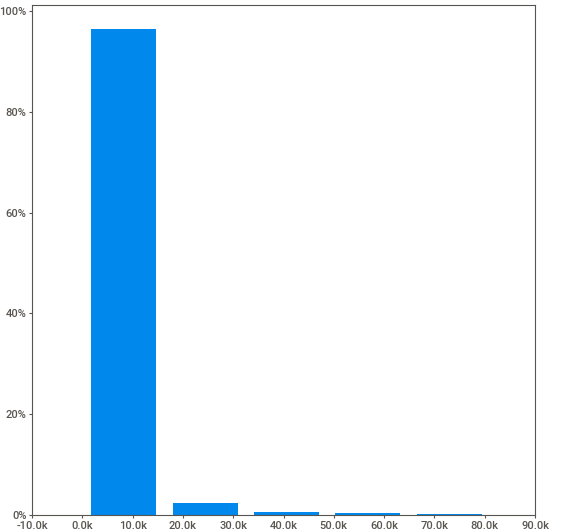
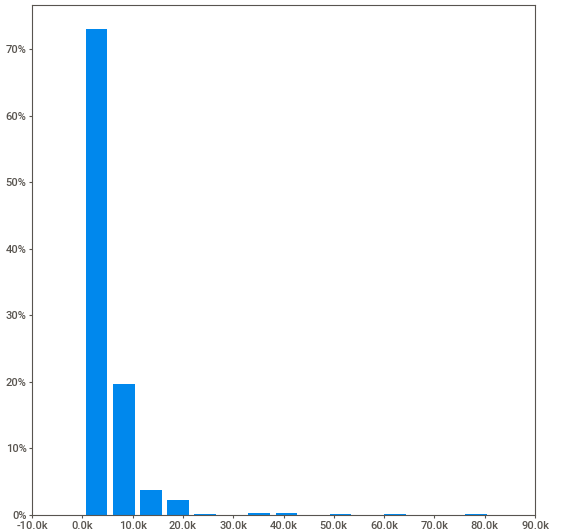
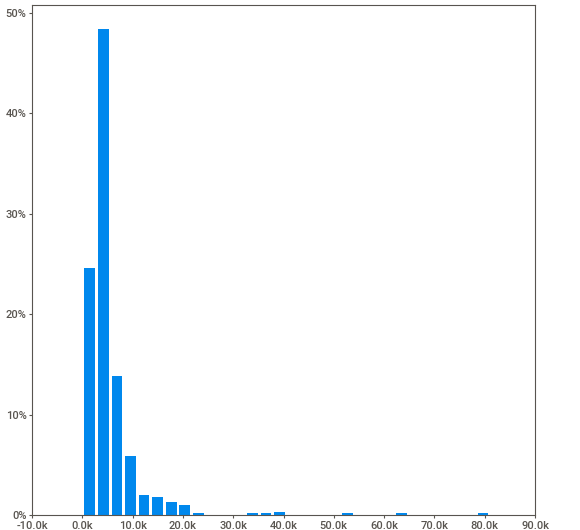
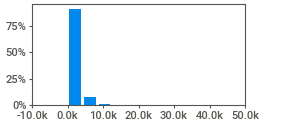
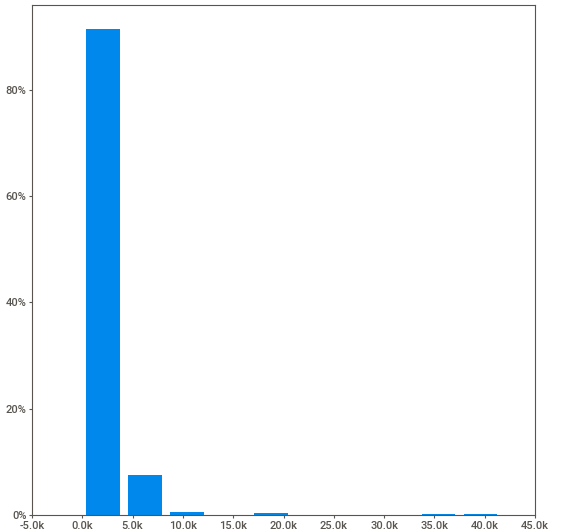
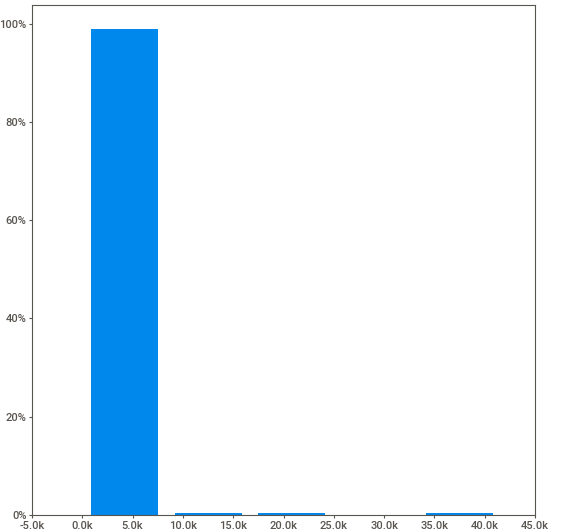
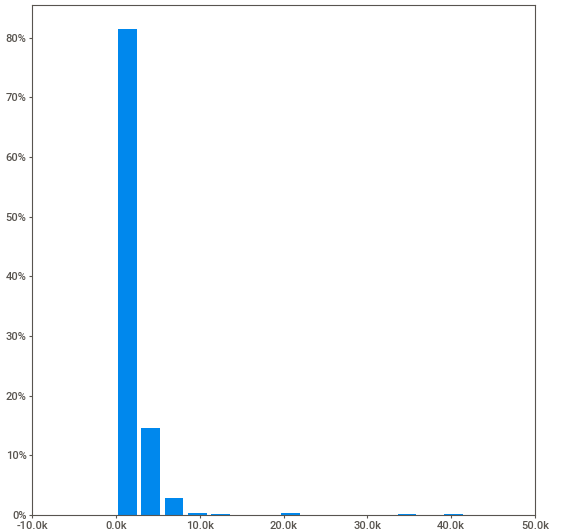
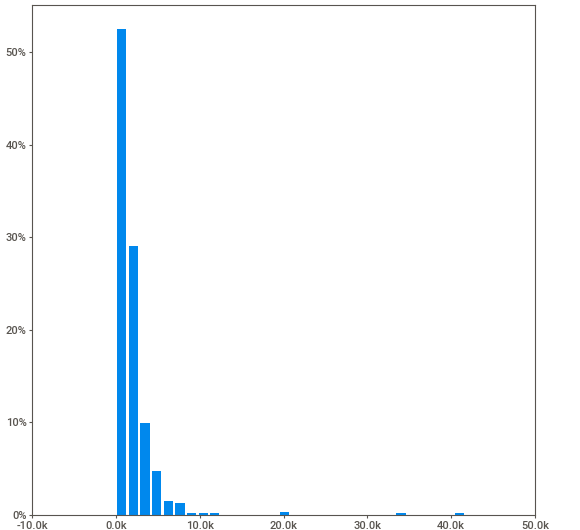
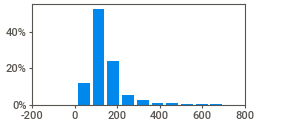
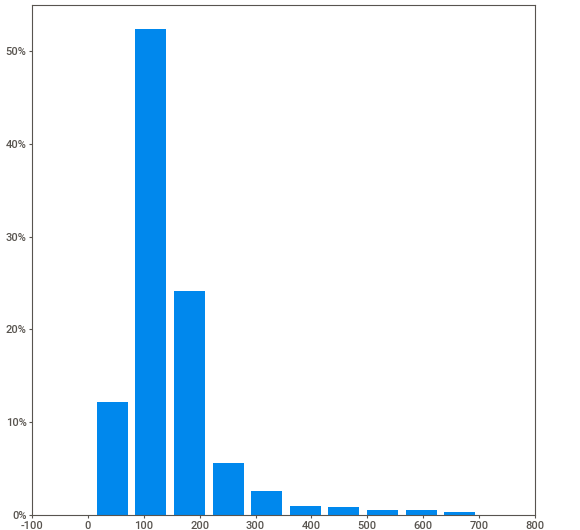
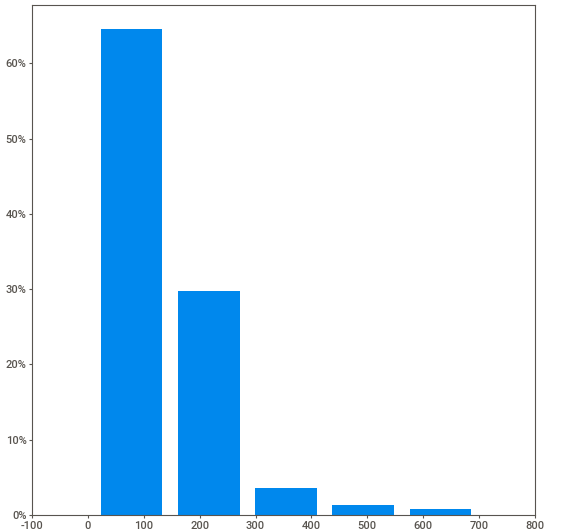
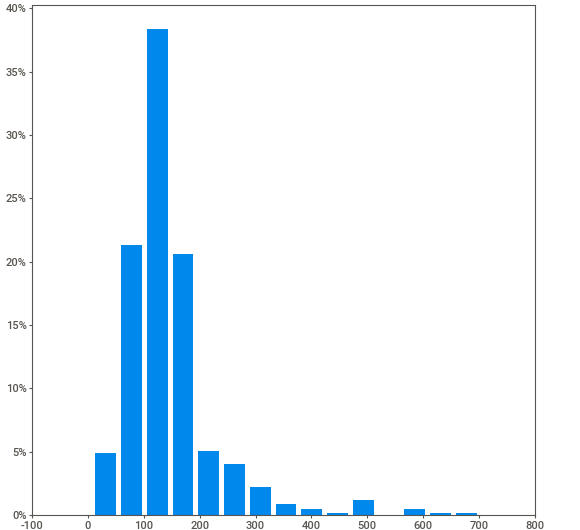
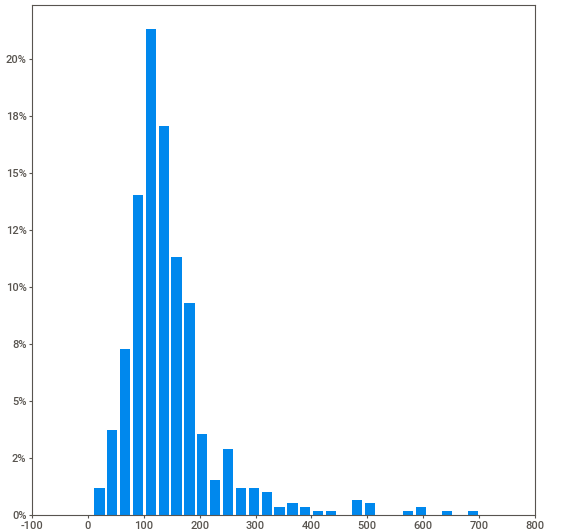
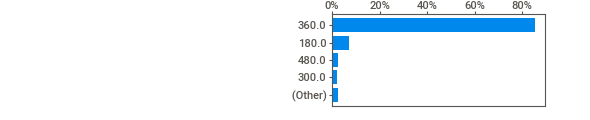
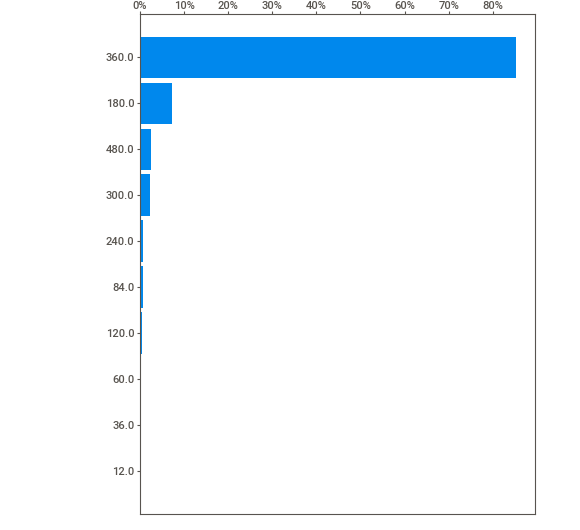
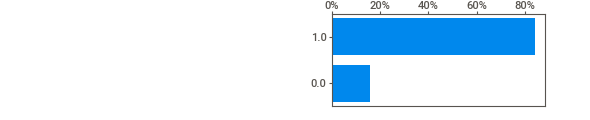
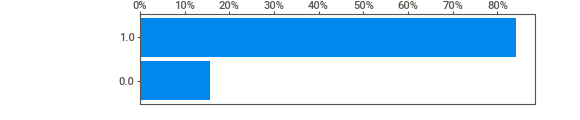
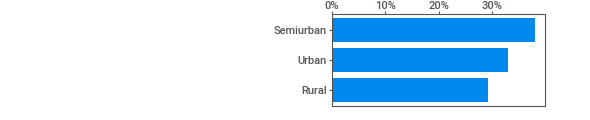
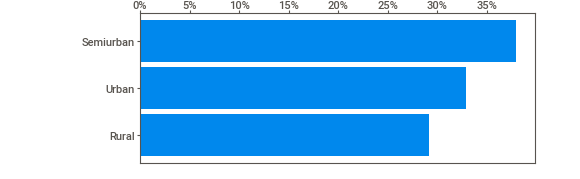
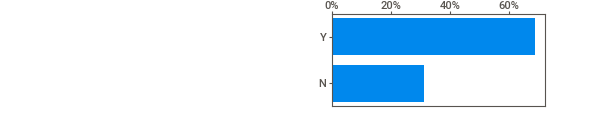
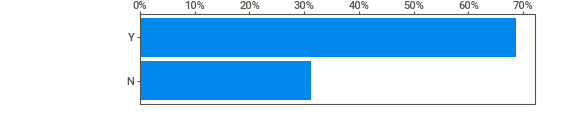
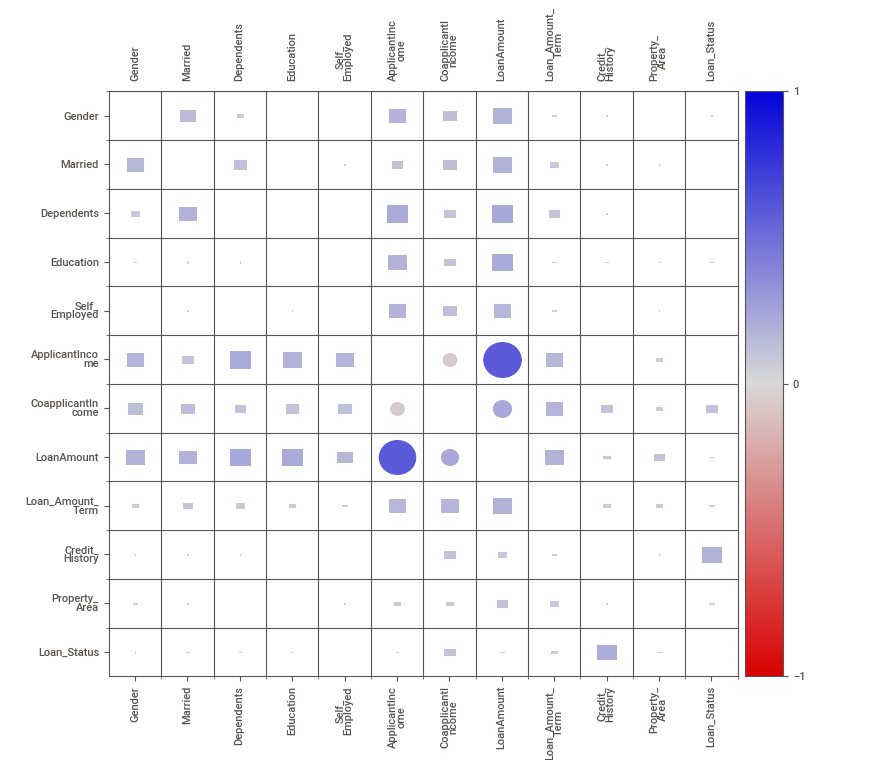
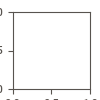

In [536]:
autoEDA = sweetviz.analyze(train)
autoEDA.show_notebook()

                                             |                                             | [  0%]   00:00 ->…


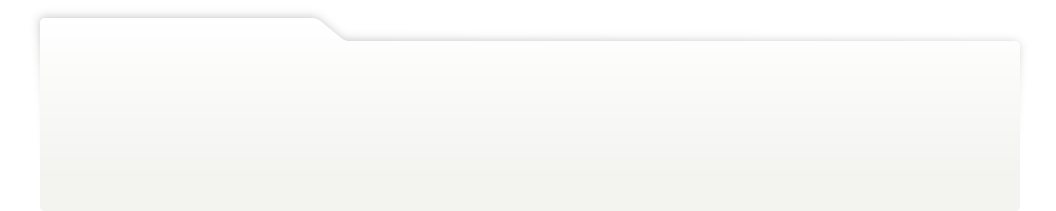
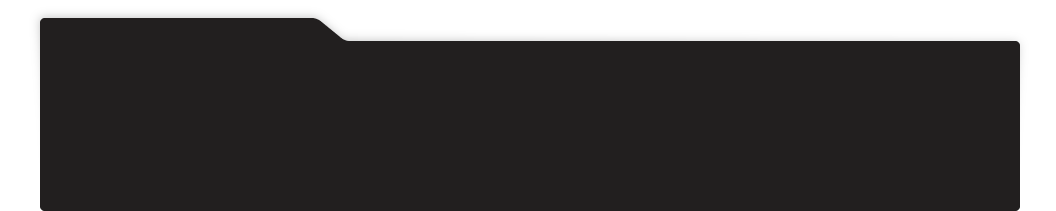
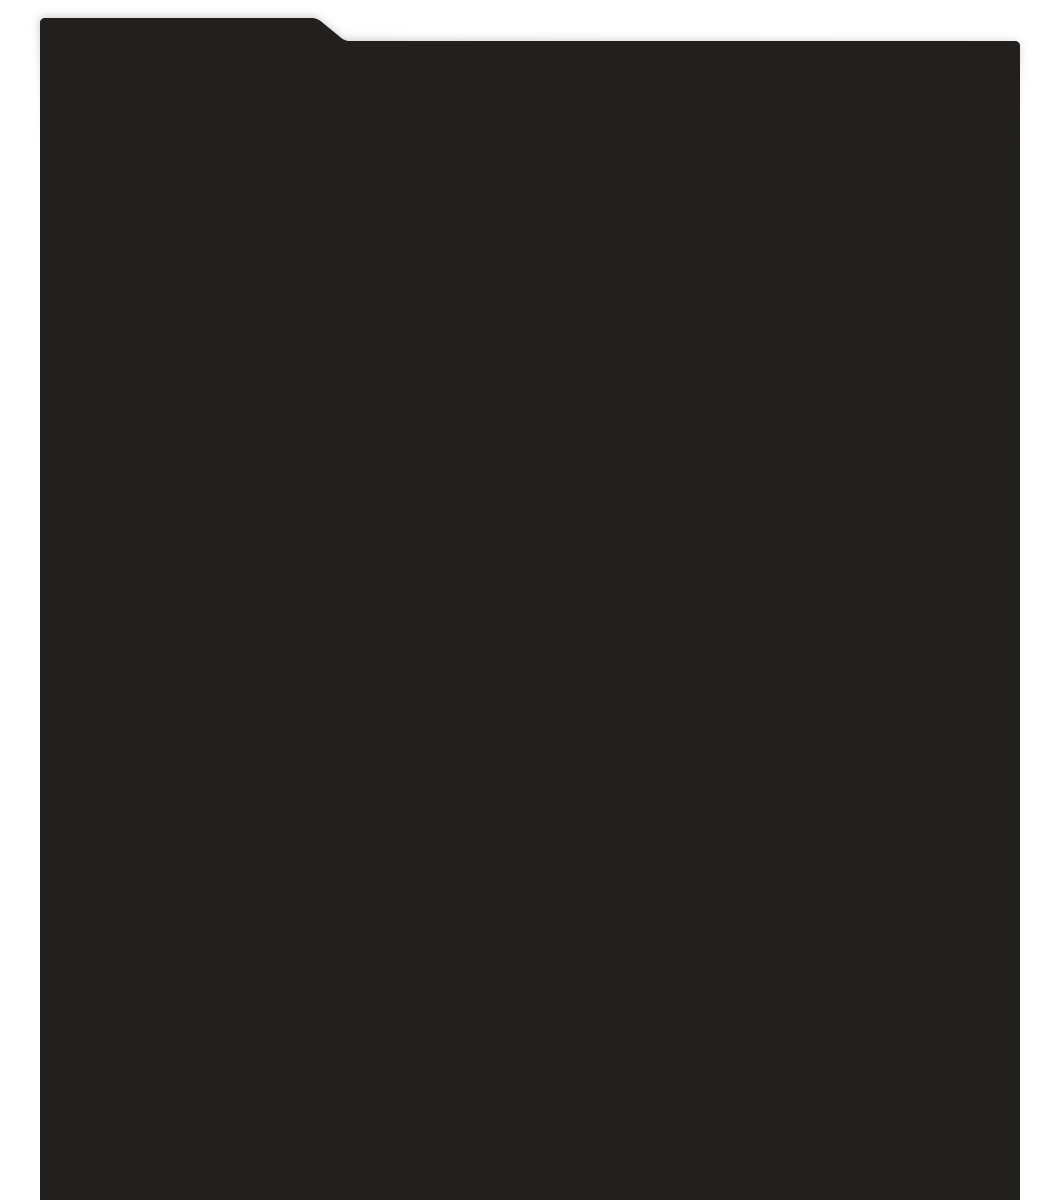
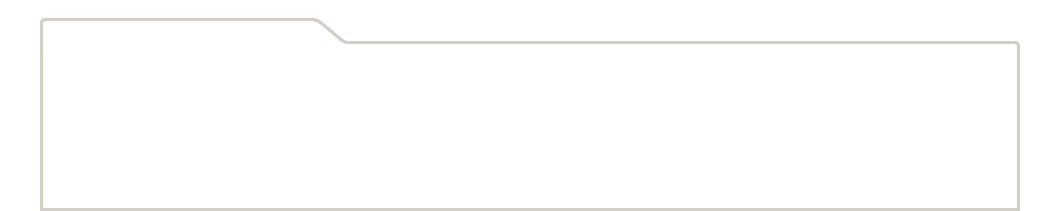
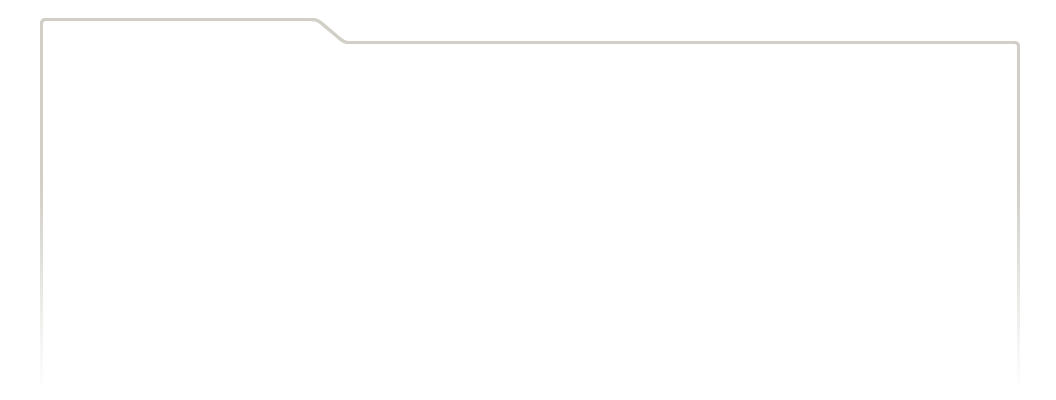
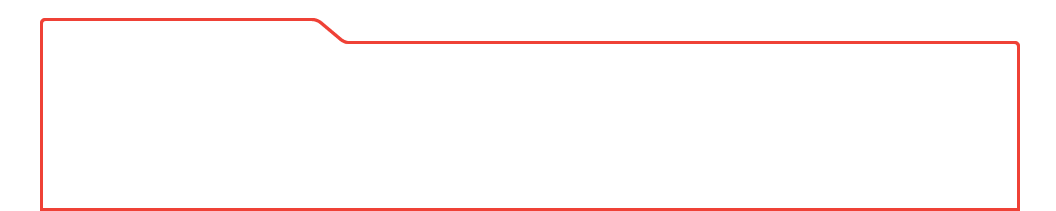
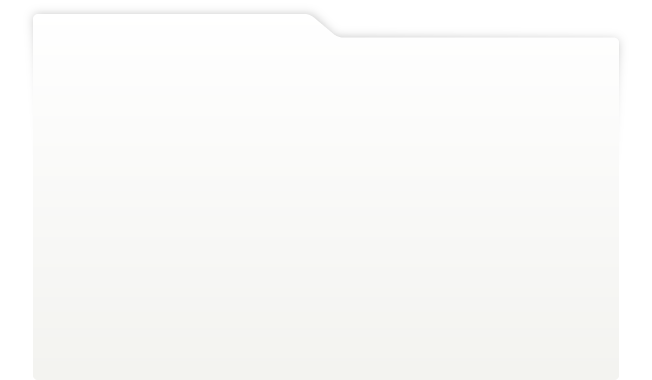
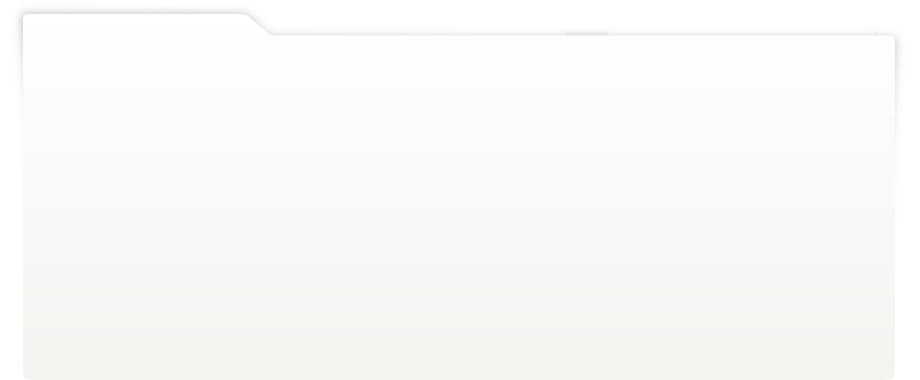
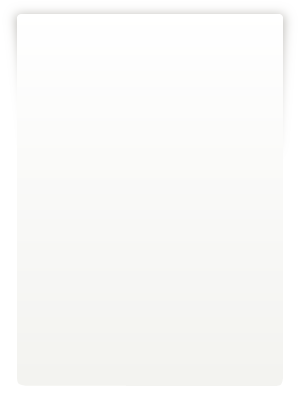
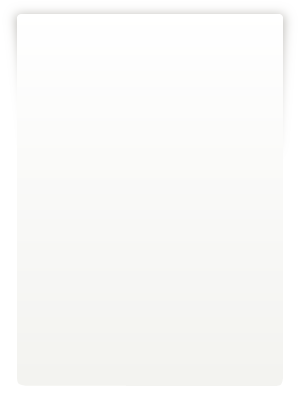
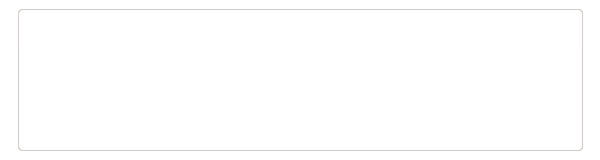
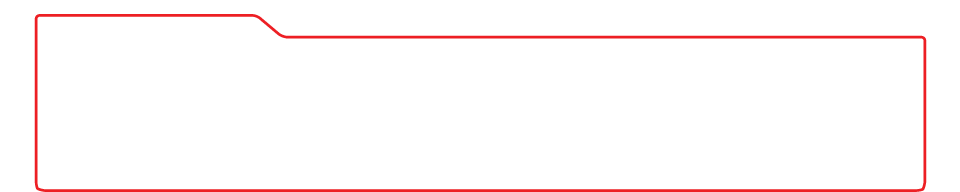
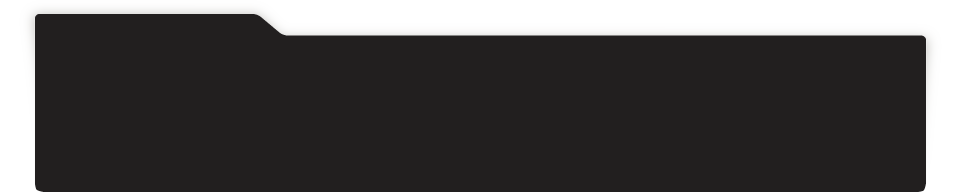
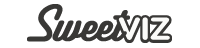
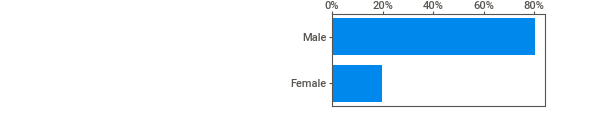
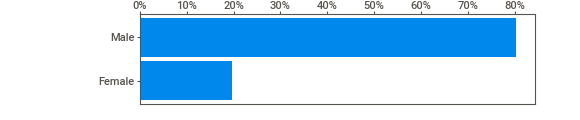
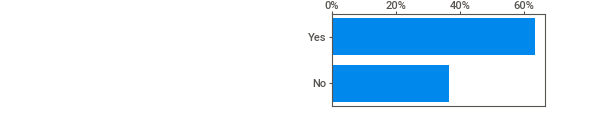
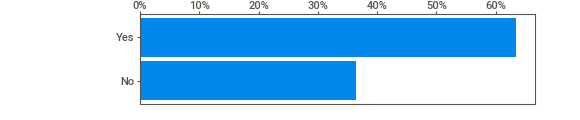
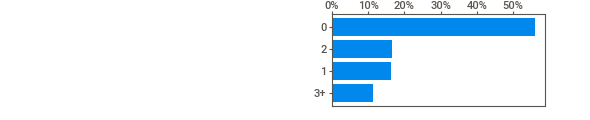
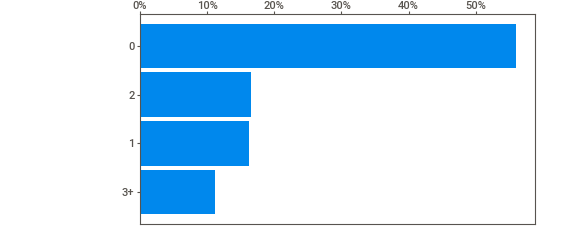
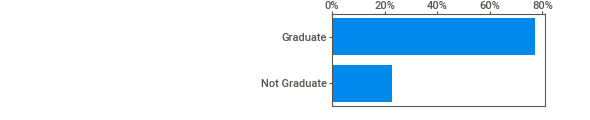
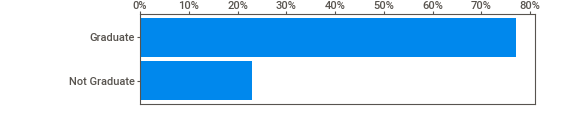
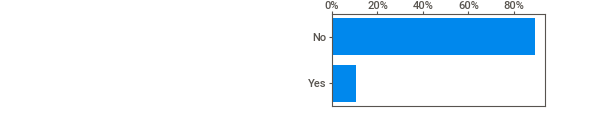
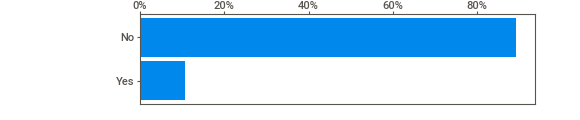
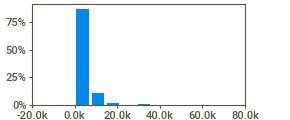
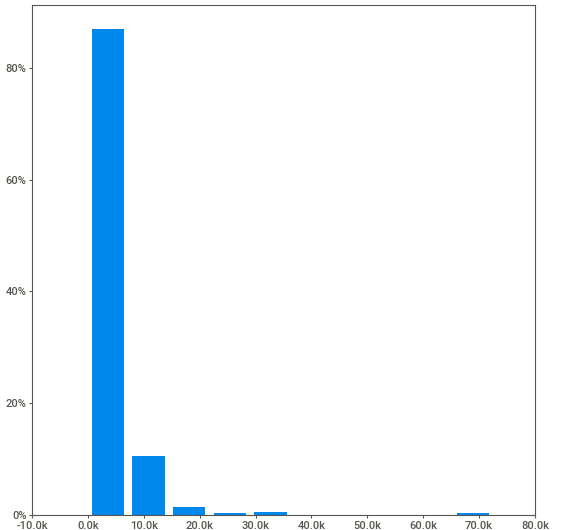
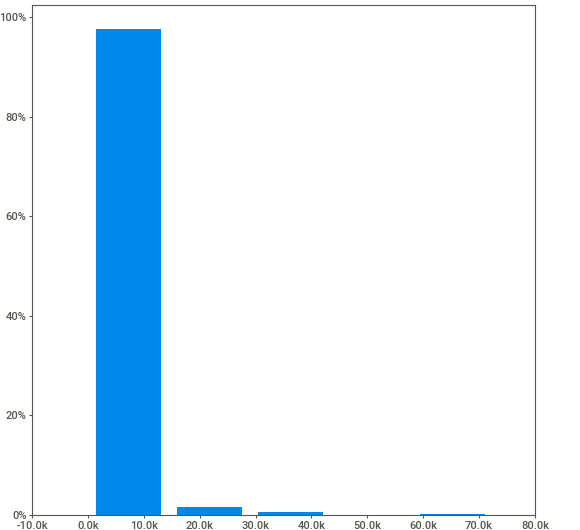
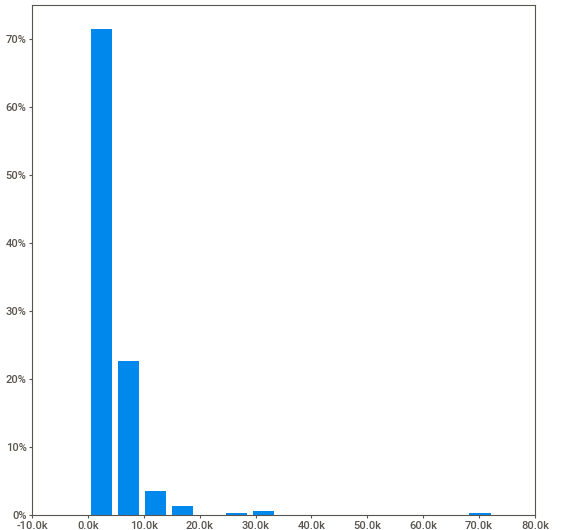
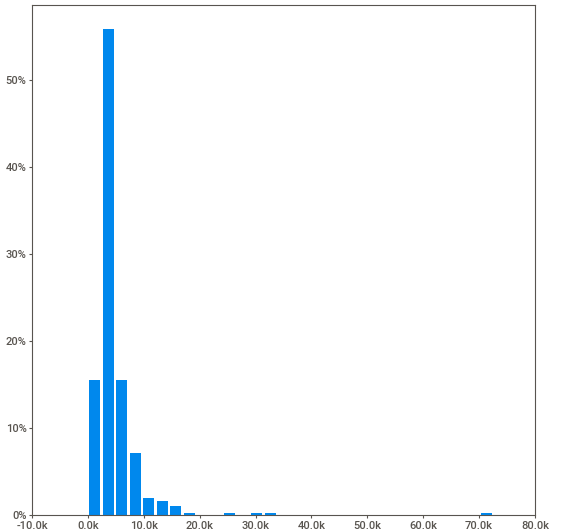
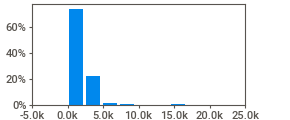
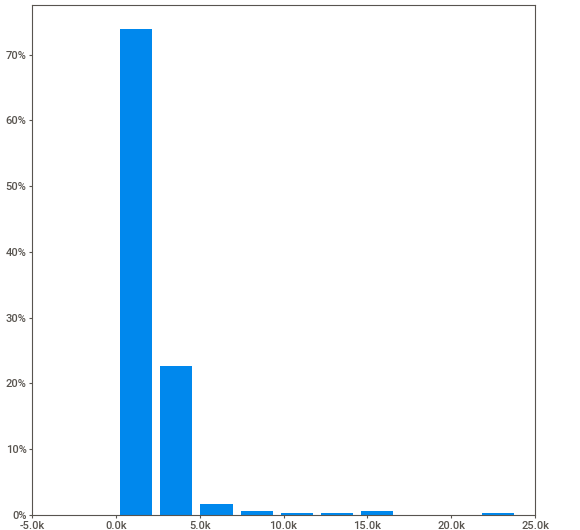
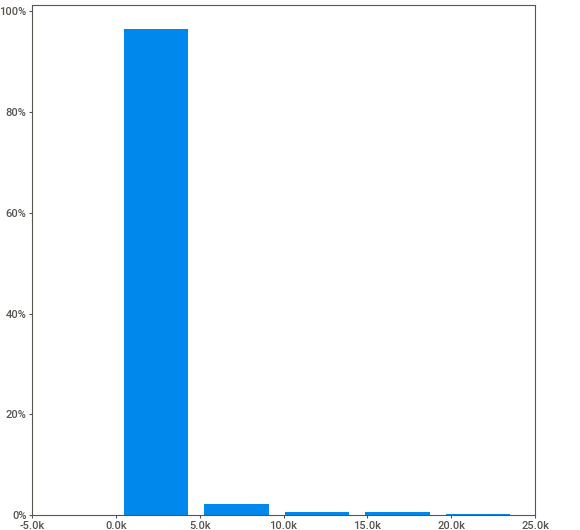
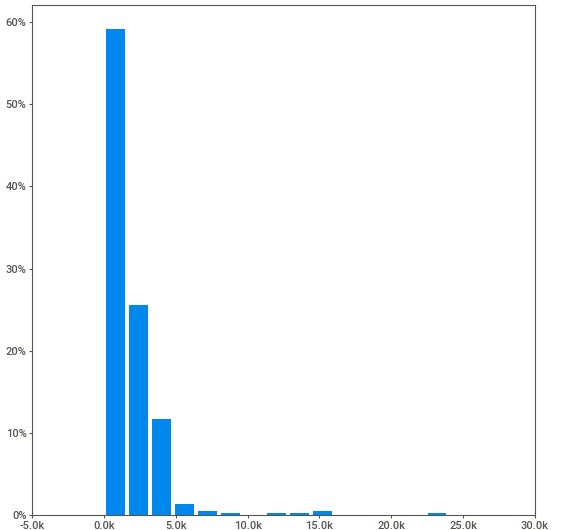
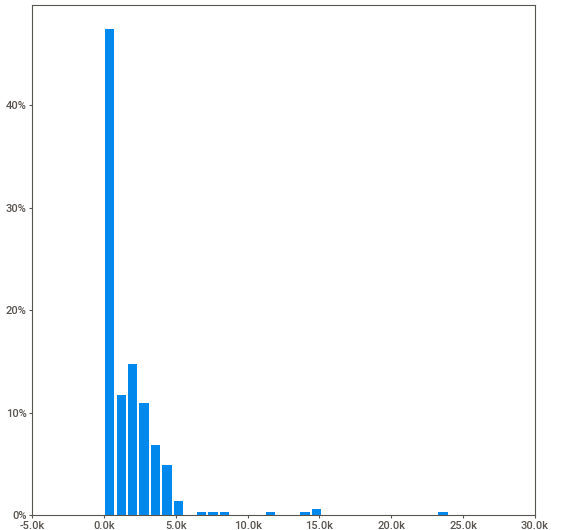
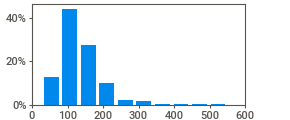
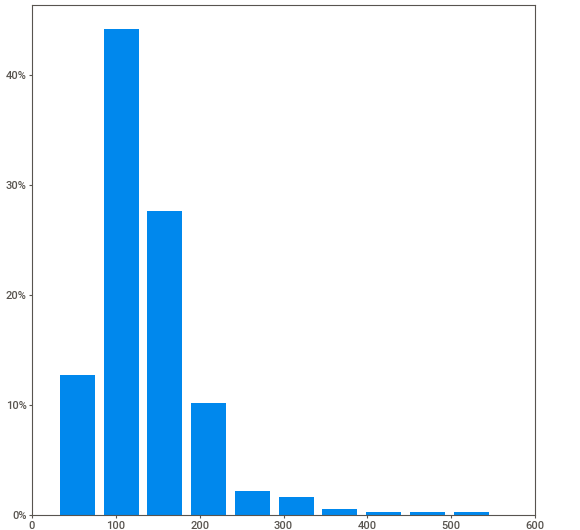
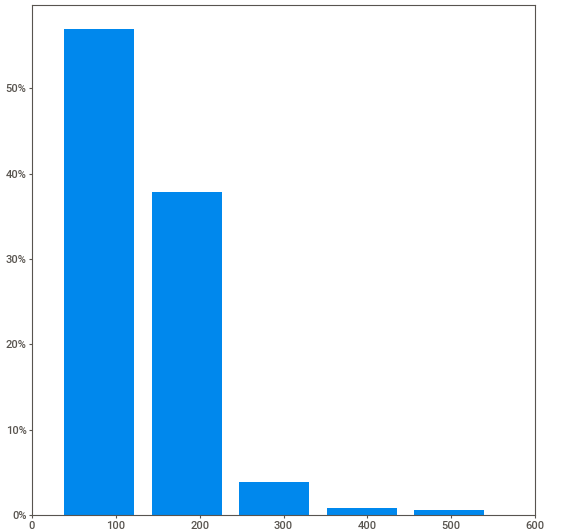
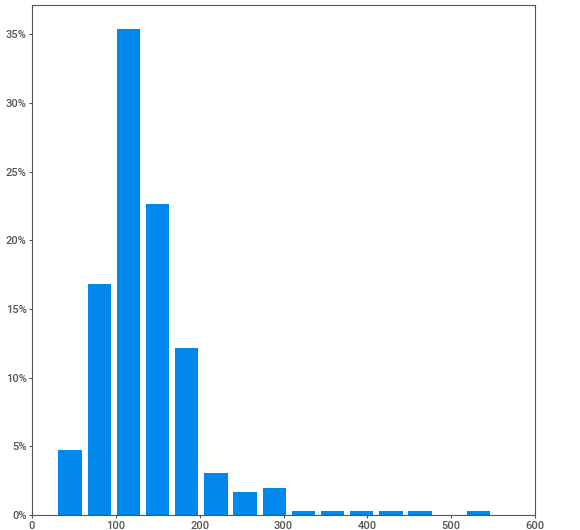
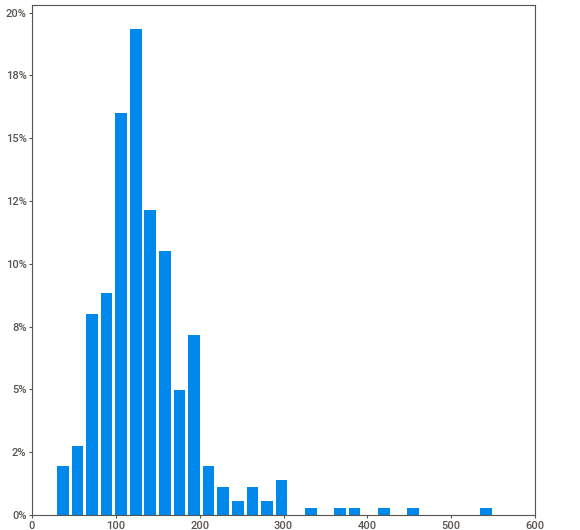
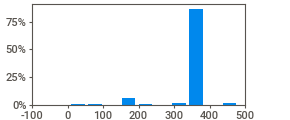
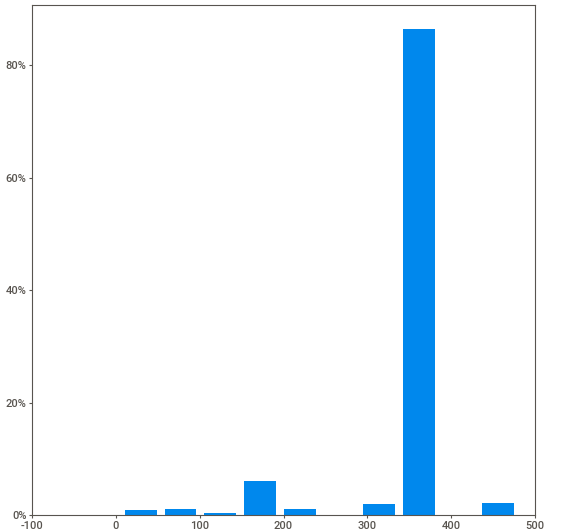
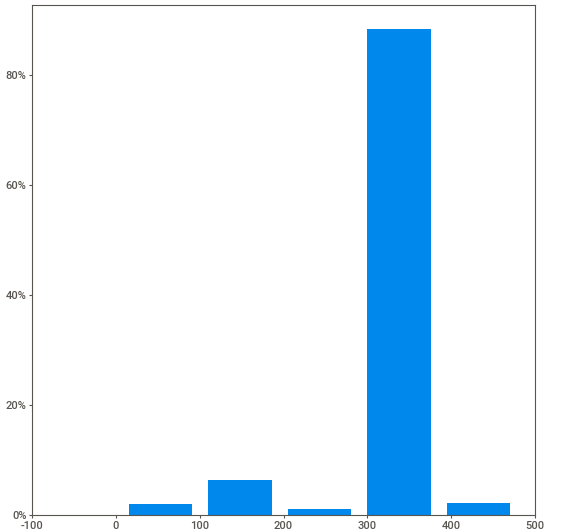
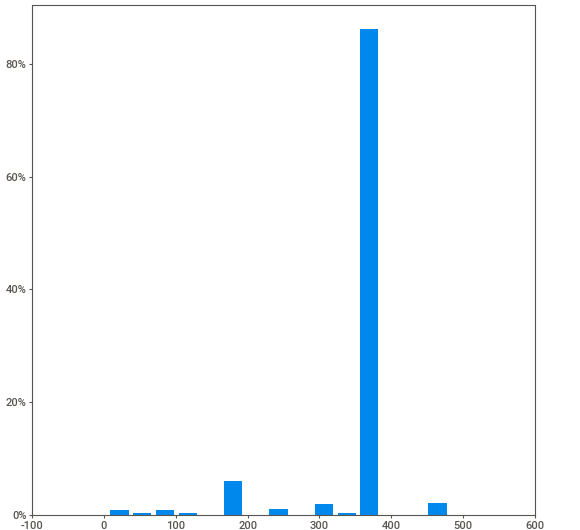
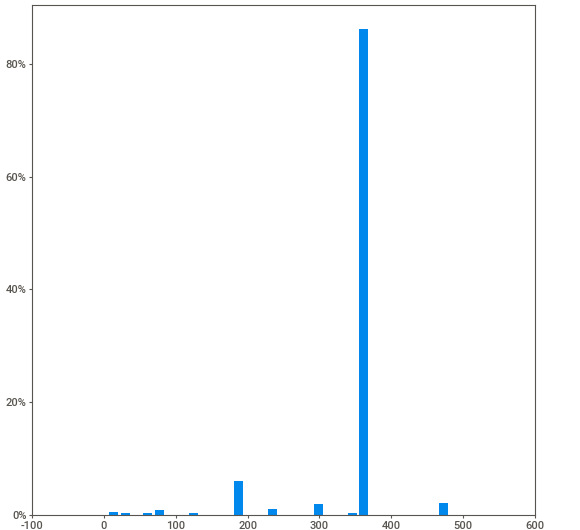
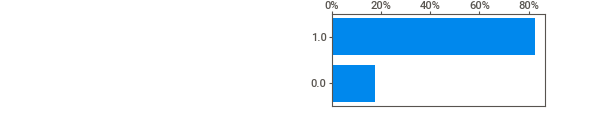
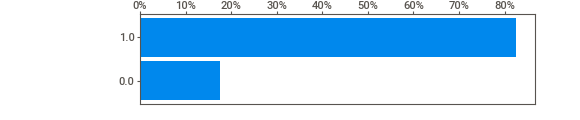
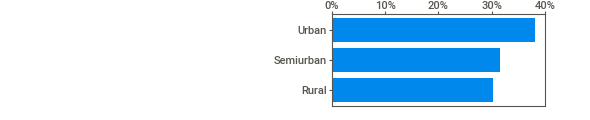
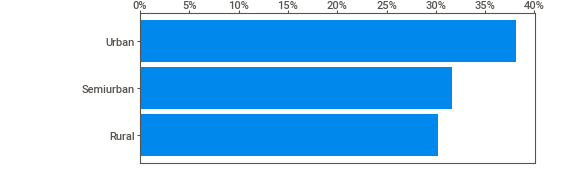
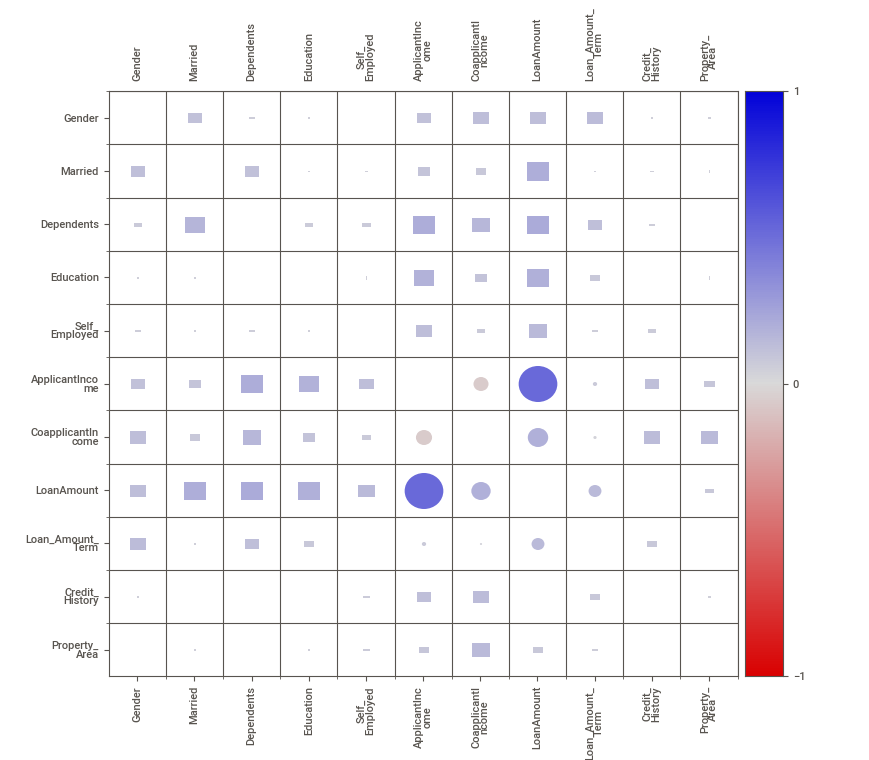
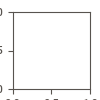

In [537]:
autoEDA = sweetviz.analyze(test)
autoEDA.show_notebook()

### Your Own EDA 


# 1. An overview of the data. (HINT: Provide the number of records, fields and their data types. Do for both).

In [538]:
train.shape

(614, 13)

In [539]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [540]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [541]:
test.shape

(367, 12)

In [542]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [543]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [544]:
for i in train.columns:
    print('----------------------------------------------------------')
    print(train[i].value_counts())

----------------------------------------------------------
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
----------------------------------------------------------
Male      489
Female    112
Name: Gender, dtype: int64
----------------------------------------------------------
Yes    398
No     213
Name: Married, dtype: int64
----------------------------------------------------------
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
----------------------------------------------------------
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
----------------------------------------------------------
No     500
Yes     82
Name: Self_Employed, dtype: int64
----------------------------------------------------------
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1


In [545]:
for i in test.columns:
    print('-----------------------------------------------')
    print(test[i].value_counts())

-----------------------------------------------
LP001015    1
LP002389    1
LP002383    1
LP002376    1
LP002375    1
           ..
LP001627    1
LP001622    1
LP001613    1
LP001611    1
LP002989    1
Name: Loan_ID, Length: 367, dtype: int64
-----------------------------------------------
Male      286
Female     70
Name: Gender, dtype: int64
-----------------------------------------------
Yes    233
No     134
Name: Married, dtype: int64
-----------------------------------------------
0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64
-----------------------------------------------
Graduate        283
Not Graduate     84
Name: Education, dtype: int64
-----------------------------------------------
No     307
Yes     37
Name: Self_Employed, dtype: int64
-----------------------------------------------
5000    6
3500    6
3333    5
7500    4
2500    4
       ..
724     1
1762    1
4243    1
4167    1
9200    1
Name: ApplicantIncome, Length: 314, dtype: int64
--------

# 2.What data quality issues exist in both train and test? (HINT: Comment any missing values and duplicates)

In [546]:
# comments identifying with value_counts and unique

In [547]:
for i in train.columns:
    print('----------------------------------------------------------')
    print(train[i].unique())

----------------------------------------------------------
['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'L

In [548]:
for i in train.columns:
    print('----------------------------------------------------------')
    print(train[i].value_counts())

----------------------------------------------------------
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
----------------------------------------------------------
Male      489
Female    112
Name: Gender, dtype: int64
----------------------------------------------------------
Yes    398
No     213
Name: Married, dtype: int64
----------------------------------------------------------
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
----------------------------------------------------------
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
----------------------------------------------------------
No     500
Yes     82
Name: Self_Employed, dtype: int64
----------------------------------------------------------
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1


In [549]:
for i in test.columns:
    print('-----------------------------------------------')
    print(test[i].unique())

-----------------------------------------------
['LP001015' 'LP001022' 'LP001031' 'LP001035' 'LP001051' 'LP001054'
 'LP001055' 'LP001056' 'LP001059' 'LP001067' 'LP001078' 'LP001082'
 'LP001083' 'LP001094' 'LP001096' 'LP001099' 'LP001105' 'LP001107'
 'LP001108' 'LP001115' 'LP001121' 'LP001124' 'LP001128' 'LP001135'
 'LP001149' 'LP001153' 'LP001163' 'LP001169' 'LP001174' 'LP001176'
 'LP001177' 'LP001183' 'LP001185' 'LP001187' 'LP001190' 'LP001203'
 'LP001208' 'LP001210' 'LP001211' 'LP001219' 'LP001220' 'LP001221'
 'LP001226' 'LP001230' 'LP001231' 'LP001232' 'LP001237' 'LP001242'
 'LP001268' 'LP001270' 'LP001284' 'LP001287' 'LP001291' 'LP001298'
 'LP001312' 'LP001313' 'LP001317' 'LP001321' 'LP001323' 'LP001324'
 'LP001332' 'LP001335' 'LP001338' 'LP001347' 'LP001348' 'LP001351'
 'LP001352' 'LP001358' 'LP001359' 'LP001361' 'LP001366' 'LP001368'
 'LP001375' 'LP001380' 'LP001386' 'LP001400' 'LP001407' 'LP001413'
 'LP001415' 'LP001419' 'LP001420' 'LP001428' 'LP001445' 'LP001446'
 'LP001450' 'L

In [550]:
for i in test.columns:
    print('-----------------------------------------------')
    print(test[i].value_counts())

-----------------------------------------------
LP001015    1
LP002389    1
LP002383    1
LP002376    1
LP002375    1
           ..
LP001627    1
LP001622    1
LP001613    1
LP001611    1
LP002989    1
Name: Loan_ID, Length: 367, dtype: int64
-----------------------------------------------
Male      286
Female     70
Name: Gender, dtype: int64
-----------------------------------------------
Yes    233
No     134
Name: Married, dtype: int64
-----------------------------------------------
0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64
-----------------------------------------------
Graduate        283
Not Graduate     84
Name: Education, dtype: int64
-----------------------------------------------
No     307
Yes     37
Name: Self_Employed, dtype: int64
-----------------------------------------------
5000    6
3500    6
3333    5
7500    4
2500    4
       ..
724     1
1762    1
4243    1
4167    1
9200    1
Name: ApplicantIncome, Length: 314, dtype: int64
--------

In [551]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [552]:
train['Dependents'] = train['Dependents'].replace(to_replace='3+',value = 3)

In [553]:
train['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [554]:
# the missings values in test data is 
# Gender               11
# Dependents           10
# Self_Employed        23
# LoanAmount            5
# Loan_Amount_Term      6
# Credit_History       29

#we can do missingvalue treatment by using mode and median

In [555]:
# duplicates droping 

In [556]:
train.shape

(614, 13)

In [557]:
train.drop_duplicates(keep='first',inplace=True)

In [558]:
train.shape

(614, 13)

In [559]:
test.shape

(367, 12)

In [560]:
test.drop_duplicates(keep='first',inplace=True)

In [561]:
test.shape

(367, 12)

In [562]:
train['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [563]:
train['Gender']=train['Gender'].fillna('Male')

In [564]:
train['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [565]:
train['Married'].mode()

0    Yes
Name: Married, dtype: object

In [566]:
train['Married'] = train['Married'].fillna('Yes')

In [567]:
train['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [568]:
train['Dependents'].mode()

0    0
Name: Dependents, dtype: object

In [569]:
train['Dependents']=train['Dependents'].fillna('0')

In [570]:
train['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

In [571]:
train['Self_Employed']=train['Self_Employed'].fillna('No')

In [572]:
train['LoanAmount'].median()

128.0

In [573]:
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].median())

In [574]:
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median())

In [575]:
train['Credit_History']=train['Credit_History'].fillna(train['Credit_History'].median())

In [576]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [577]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [578]:
test['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [579]:
test['Gender'] = test['Gender'].fillna('Male')

In [580]:
test['Dependents'].mode()

0    0
Name: Dependents, dtype: object

In [581]:
test['Dependents'] =test['Dependents'].fillna('0')

In [582]:
test['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

In [583]:
test['Self_Employed'] = test['Self_Employed'].fillna('No')

In [584]:
test['LoanAmount'].median()

125.0

In [585]:
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].median())

In [586]:
test['Loan_Amount_Term'].median()

360.0

In [587]:
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median())

In [588]:
test['Credit_History'].median()

1.0

In [589]:
test['Credit_History']=test['Credit_History'].fillna(test['Credit_History'].median())

In [590]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [591]:
test['Dependents'].value_counts()

0     210
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [592]:
test['Dependents'] = test['Dependents'].replace(to_replace='3+',value = '3')

In [593]:
test['Dependents'].value_counts()

0    210
2     59
1     58
3     40
Name: Dependents, dtype: int64

In [594]:
test['Dependents'] = test['Dependents'].astype(int)

In [595]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    int32  
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int32(1), int64(2), object(6)
memory usage: 35.8+ KB


In [596]:
train['Credit_History'] = train['Credit_History'].astype(int)

In [597]:
test['Credit_History'] = test['Credit_History'].astype(int)

In [598]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    int32  
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 64.8+ KB


# 3. How do the the loan statuses compare? i.e. what is the distrubition of each?

In [599]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

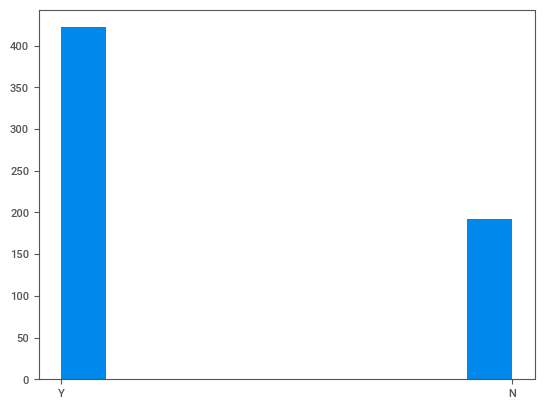

In [600]:
plt.hist(train["Loan_Status"])
plt.show()

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

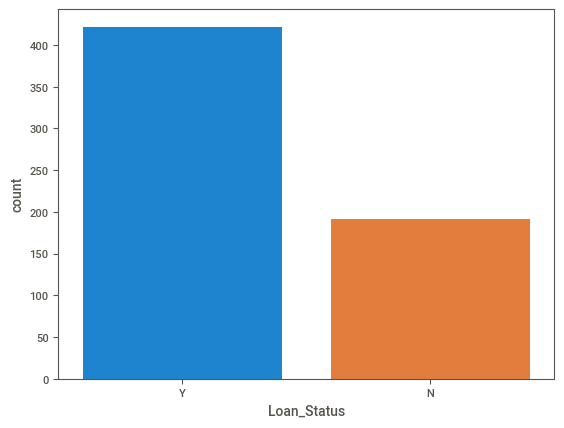

In [601]:
sns.countplot(train['Loan_Status'])

In [602]:
status_counts = train.groupby('Loan_Status').size()
status_counts

Loan_Status
N    192
Y    422
dtype: int64

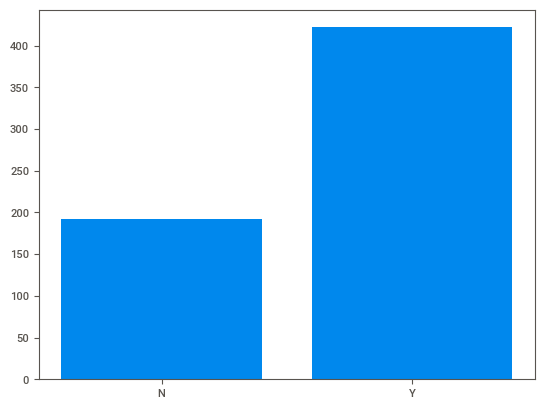

In [603]:
plt.bar(status_counts.index, status_counts.values)
plt.show()

In [604]:
# as for this project loan_status is the target so we observed the the distribution of loanstatus.
# by using histplot,countplot,barplot i have done.
# below we can see the N and Y records in loan status
# N    192
# Y    422

# 4. How do women and men compare when it comes to defaulting on loans in the historical dataset?

In [605]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

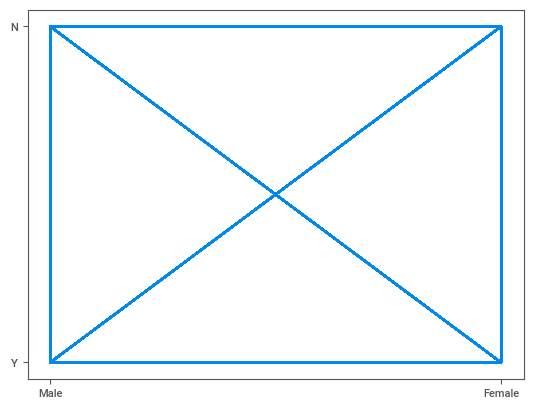

In [606]:
plt.plot(train['Gender'],train['Loan_Status'])

<AxesSubplot:xlabel='Gender'>

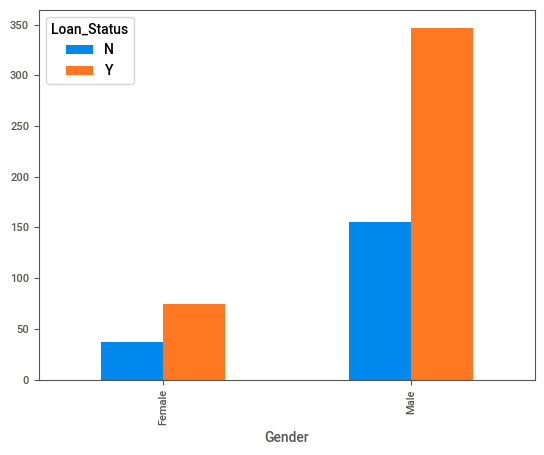

In [607]:
# group the loans by gender and status
gender_status =train.groupby(['Gender', 'Loan_Status']).size().unstack()

gender_status.plot(kind = 'bar')

<AxesSubplot:>

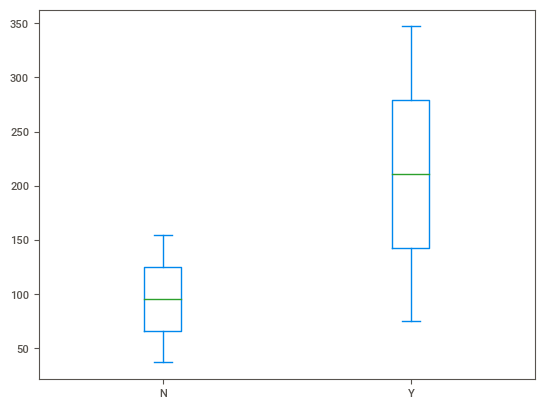

In [608]:
gender_status.plot(kind = 'box')

<AxesSubplot:ylabel='Frequency'>

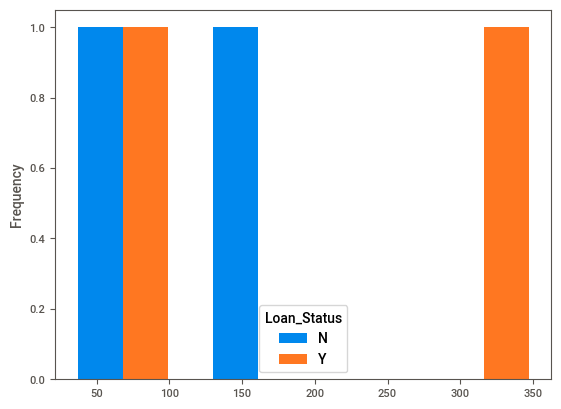

In [609]:
gender_status.plot(kind = 'hist')

In [610]:
train['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [611]:
train['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [612]:
train_gender = pd.get_dummies(train["Gender"])
train_gender

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
609,1,0
610,0,1
611,0,1
612,0,1


In [613]:
train_status = pd.get_dummies(train['Loan_Status'])
train_status

,N,Y
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
609,0,1
610,0,1
611,0,1
612,0,1


In [614]:
import scipy.stats as stats

In [615]:
stats.chi2_contingency(train_gender,train_status)

(614.0,
 0.4810242844003644,
 613,
 array([[0.18241042, 0.81758958],
        [0.18241042, 0.81758958],
        [0.18241042, 0.81758958],
        ...,
        [0.18241042, 0.81758958],
        [0.18241042, 0.81758958],
        [0.18241042, 0.81758958]]))

In [616]:
# from this stats model the pvale is 0.48
0.48<0.05

False

# 5. How many of the loan applicants have dependents based on the historical dataset?

In [617]:
train['Dependents'].unique()

array(['0', '1', '2', 3], dtype=object)

<AxesSubplot:xlabel='Dependents', ylabel='Density'>

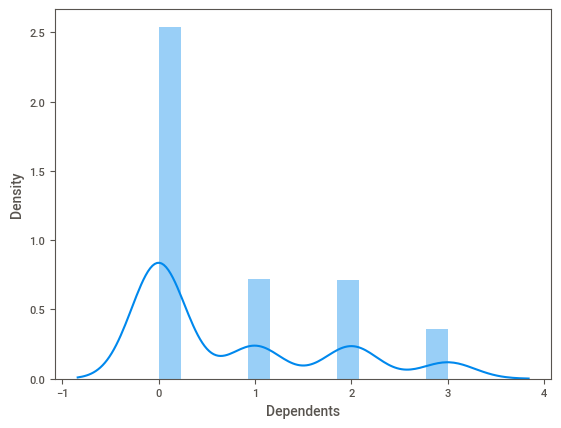

In [618]:
sns.distplot(train['Dependents'])

<AxesSubplot:xlabel='Dependents', ylabel='Density'>

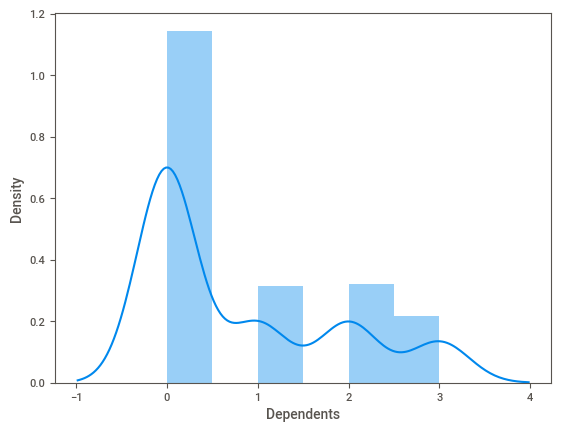

In [619]:
sns.distplot(test['Dependents'])

In [620]:
# Count the number of non-null values in the "Dependents" column
num_dependents = train["Dependents"].count()

# Print the result
print("The number of loan applicants with dependents is:", num_dependents)

The number of loan applicants with dependents is: 614


In [621]:
num_dependents = test["Dependents"].count()

# Print the result
print("The number of loan applicants with dependents is:", num_dependents)

The number of loan applicants with dependents is: 367


In [622]:
# Count the number of non-null values in the "Dependents" column
num_dependents = test["Dependents"].count()

# Print the result
print("The number of loan applicants with dependents is:", num_dependents)

The number of loan applicants with dependents is: 367


In [623]:
train['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [624]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

# 6. How do the incomes of those who are employed compare to those who are self employed based on the historical dataset?

In [625]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [626]:
# Group the data by employment type and calculate the mean income for each group
income_by_employment = train.groupby("Self_Employed")["ApplicantIncome"].mean()

# Print the result
print("Mean income by employment type:")
print(income_by_employment)

Mean income by employment type:
Self_Employed
No     5098.678571
Yes    7380.817073
Name: ApplicantIncome, dtype: float64


<AxesSubplot:xlabel='Self_Employed'>

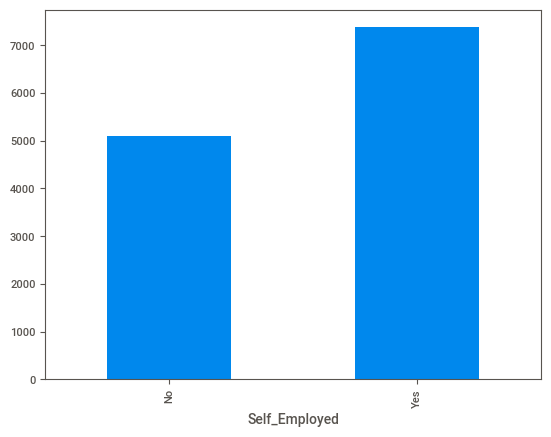

In [627]:
income_by_employment.plot(kind = 'bar')

<AxesSubplot:xlabel='Self_Employed', ylabel='ApplicantIncome'>

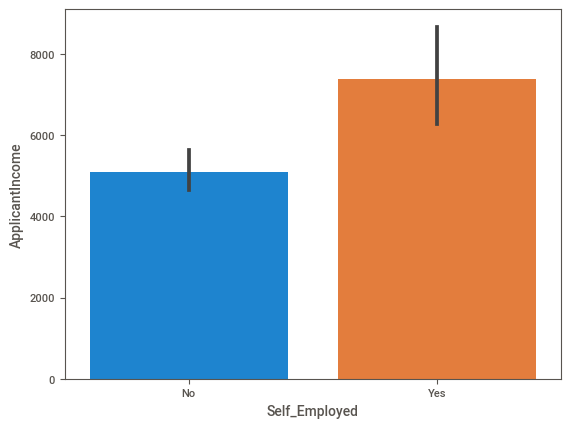

In [628]:
sns.barplot(train['Self_Employed'],train["ApplicantIncome"])

In [452]:
# Group the data by employment type and calculate the mean income for each group
income_by_employment_test = test.groupby("Self_Employed")["ApplicantIncome"].mean()

# Print the result
print("Mean income by employment type:")
print(income_by_employment_test)

Mean income by employment type:
Self_Employed
No     4685.712121
Yes    5874.864865
Name: ApplicantIncome, dtype: float64


<AxesSubplot:xlabel='Self_Employed'>

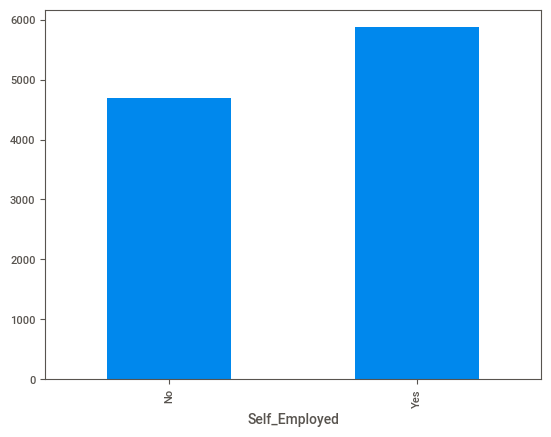

In [453]:
income_by_employment_test.plot(kind = 'bar')

In [502]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    int32  
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 64.8+ KB


<AxesSubplot:xlabel='Self_Employed', ylabel='ApplicantIncome'>

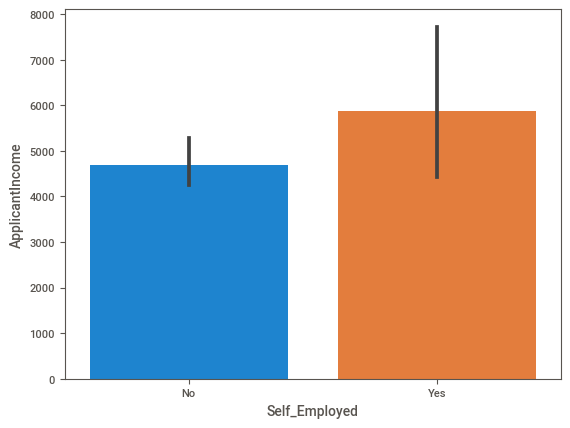

In [454]:
sns.barplot(test['Self_Employed'],test["ApplicantIncome"])

# 7. Are applicants with a credit history more likely to default than those who do not have one?


In [455]:
train['Credit_History'].value_counts()

1    525
0     89
Name: Credit_History, dtype: int64

In [456]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

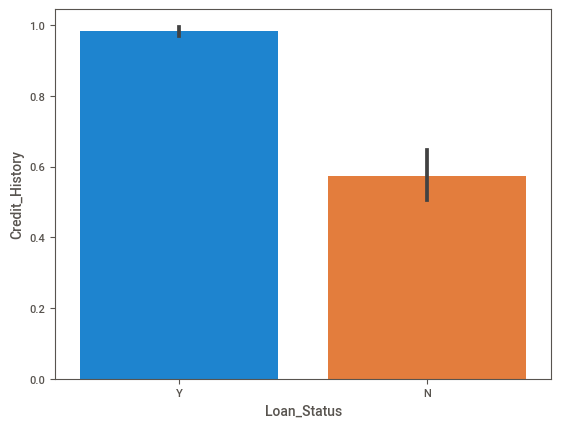

In [457]:
sns.barplot(train["Loan_Status"],train['Credit_History'])

In [458]:
test['Credit_History'].value_counts()

1    308
0     59
Name: Credit_History, dtype: int64

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

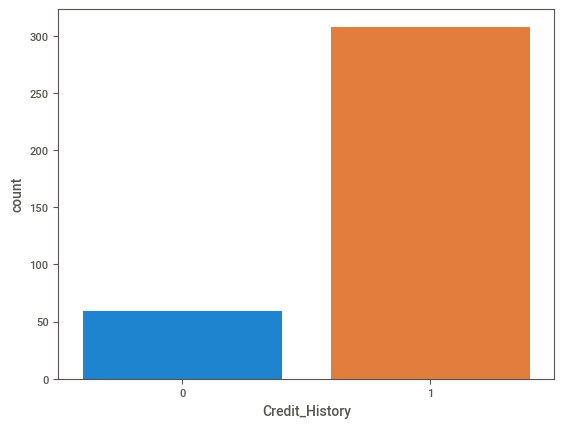

In [459]:
sns.countplot(test['Credit_History'])

# 8. Is there a correlation between the applicant's income and the loan amount they applied for? 

In [460]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

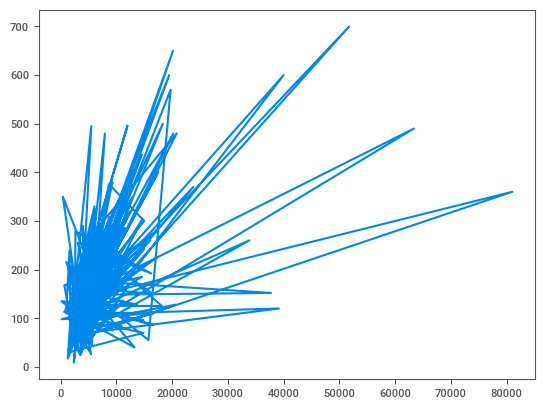

In [461]:
plt.plot(train["ApplicantIncome"],train["LoanAmount"])

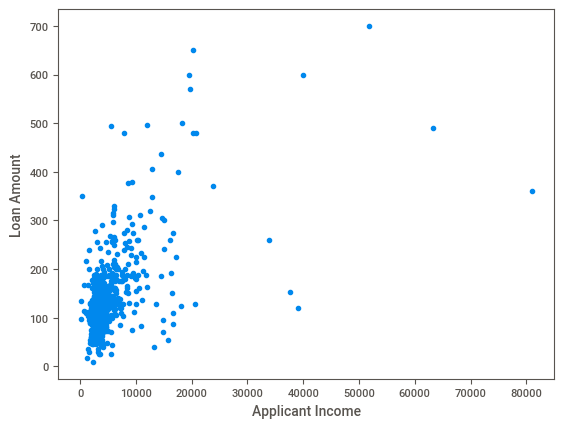

In [462]:
plt.scatter(train["ApplicantIncome"], train["LoanAmount"])

plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

<AxesSubplot:>

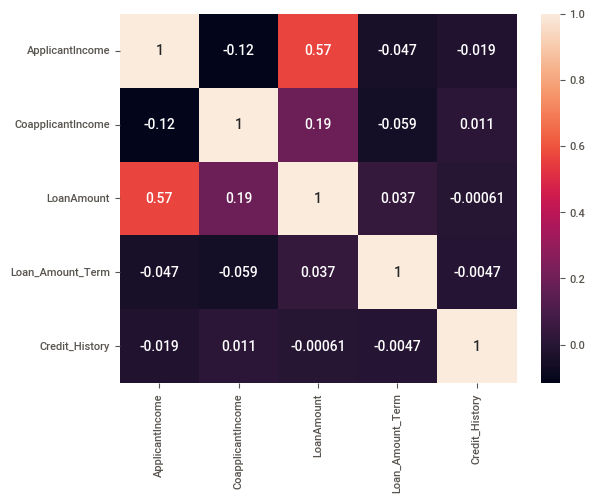

In [463]:
sns.heatmap(train.corr(),annot = True)

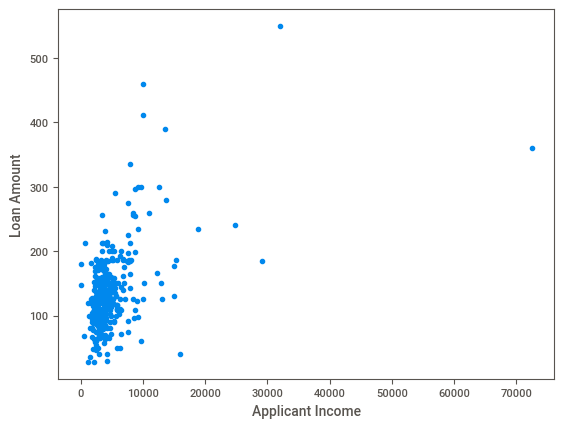

In [464]:
plt.scatter(test["ApplicantIncome"], test["LoanAmount"])

plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

<AxesSubplot:>

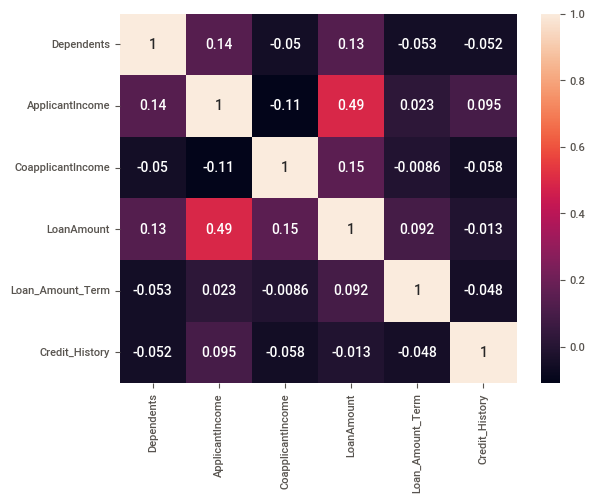

In [465]:
sns.heatmap(test.corr(),annot = True)

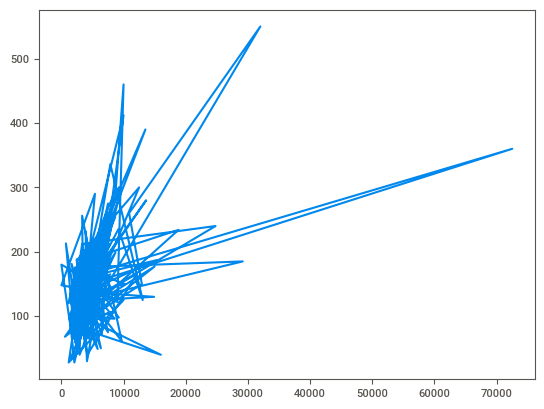

In [466]:
plt.plot(test["ApplicantIncome"], test["LoanAmount"])

## Your anwers:

1.

2.

3.

4.

5.

6.

7.

8.

9.

10.

# Part Two

## Auto ML wth autosklearn


In [498]:
# Matrix of features
X = train[['Gender',
'Married',
'Dependents',
'Education',
'Self_Employed',
'ApplicantIncome',
'CoapplicantIncome',
'LoanAmount',
'Loan_Amount_Term',
'Credit_History',
'Property_Area']]

# convert string(text) to categorical
X['Gender'] = X['Gender'].astype('category')
X['Married'] = X['Married'].astype('category')
X['Education'] = X['Education'].astype('category')
X['Dependents'] = X['Dependents'].astype('category')
X['Self_Employed'] = X['Self_Employed'].astype('category')
X['Property_Area'] = X['Property_Area'].astype('category')


# label encode target
y = train['Loan_Status'].map({'N':0,'Y':1}).astype(int)


# # train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [637]:
# Matrix of features

df = train[['Gender',
'Married',
'Education',
'Self_Employed',
'ApplicantIncome',
'CoapplicantIncome',
'LoanAmount',
'Loan_Amount_Term',
'Credit_History']]


# imputing the missing values:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

# encoding categorical features
df['Gender'] = df['Gender'].map({'Male':0,'Female':1}).astype(int)
df['Married'] = df['Married'].map({'No':0,'Yes':1}).astype(int)
df['Education'] = df['Education'].map({'Not Graduate':0,'Graduate':1}).astype(int)
df['Self_Employed'] = df['Self_Employed'].map({'No':0,'Yes':1}).astype(int)
df['Credit_History'] = df['Credit_History'].astype(int)


df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace = True)
 
X = df.copy()

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [642]:
X_train.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')

In [643]:
X_test.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')

In [644]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [645]:
X_train = pd.DataFrame(X_train,columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'] )
X_train

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,-0.483393,0.757442,0.534173,-0.397516,0.083915,0.180667,1.355734,0.287611,0.407763
1,-0.483393,0.757442,0.534173,-0.397516,-0.429338,0.385430,-0.197609,0.287611,0.407763
2,-0.483393,0.757442,0.534173,-0.397516,0.126095,0.005831,0.718168,0.287611,0.407763
3,-0.483393,0.757442,0.534173,-0.397516,-0.576970,0.464185,-0.232385,0.287611,0.407763
4,-0.483393,-1.320234,0.534173,-0.397516,-0.225522,-0.528127,-0.580149,0.287611,-2.452404
...,...,...,...,...,...,...,...,...,...
486,-0.483393,0.757442,-1.872054,2.515623,-0.612064,0.062535,-0.591741,0.287611,0.407763
487,-0.483393,0.757442,0.534173,-0.397516,0.997882,-0.173415,0.892050,0.287611,0.407763
488,2.068712,-1.320234,0.534173,-0.397516,-0.382264,-0.528127,-1.368412,0.287611,0.407763
489,2.068712,0.757442,0.534173,-0.397516,0.766733,-0.528127,-0.232385,-1.506760,0.407763


In [646]:
X_test = pd.DataFrame(X_test,columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'] )
X_test

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,-0.427425,0.618080,0.505076,-0.372678,0.603713,-0.906211,1.238880,0.209063,0.427425
1,-0.427425,0.618080,0.505076,-0.372678,-0.103326,-0.906211,-0.089365,0.209063,0.427425
2,-0.427425,0.618080,0.505076,-0.372678,-0.124509,0.029939,0.290133,0.209063,0.427425
3,2.339591,-1.617914,0.505076,-0.372678,-0.312193,-0.906211,-0.889023,0.209063,0.427425
4,-0.427425,-1.617914,0.505076,-0.372678,-0.339154,-0.906211,-0.902576,0.209063,0.427425
...,...,...,...,...,...,...,...,...,...
118,-0.427425,0.618080,0.505076,-0.372678,-0.191317,-0.906211,-1.282075,-3.204398,0.427425
119,2.339591,-1.617914,0.505076,-0.372678,-0.370410,-0.906211,-1.092325,0.209063,0.427425
120,-0.427425,0.618080,0.505076,-0.372678,-0.314860,0.286135,-0.184240,2.484703,0.427425
121,-0.427425,0.618080,0.505076,-0.372678,-0.371447,0.284194,-0.373989,0.209063,0.427425


In [469]:
df1 = test[['Gender',
'Married',
'Education',
'Self_Employed',
'ApplicantIncome',
'CoapplicantIncome',
'LoanAmount',
'Loan_Amount_Term',
'Credit_History']]


# imputing the missing values:
df1['Gender'].fillna(df1['Gender'].mode()[0], inplace = True)
df1['Married'].fillna(df1['Married'].mode()[0], inplace = True)
df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0], inplace = True)
df1['Credit_History'].fillna(df1['Credit_History'].mode()[0], inplace = True)

# encoding categorical features
df1['Gender'] = df1['Gender'].map({'Male':0,'Female':1}).astype(int)
df1['Married'] = df1['Married'].map({'No':0,'Yes':1}).astype(int)
df1['Education'] = df1['Education'].map({'Not Graduate':0,'Graduate':1}).astype(int)
df1['Self_Employed'] = df1['Self_Employed'].map({'No':0,'Yes':1}).astype(int)
df1['Credit_History'] = df1['Credit_History'].astype(int)


df1['LoanAmount'].fillna(df1['LoanAmount'].mean(), inplace = True)
df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mean(), inplace = True)
 
X = df.copy()

In [470]:
df1

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,1,1,0,5720,0,110.0,360.0,1
1,0,1,1,0,3076,1500,126.0,360.0,1
2,0,1,1,0,5000,1800,208.0,360.0,1
3,0,1,1,0,2340,2546,100.0,360.0,1
4,0,0,0,0,3276,0,78.0,360.0,1
...,...,...,...,...,...,...,...,...,...
362,0,1,0,1,4009,1777,113.0,360.0,1
363,0,1,1,0,4158,709,115.0,360.0,1
364,0,0,1,0,3250,1993,126.0,360.0,1
365,0,1,1,0,5000,2393,158.0,360.0,1


## Bespoke ML sklearn

### Data Preparation

In [471]:
# some classifiers you can pick from (remember to import)
import sklearn
classifiers = sklearn.utils.all_estimators(type_filter=None)
for name, class_ in classifiers:
    if hasattr(class_, 'predict_proba'):
        print(name)

AdaBoostClassifier
BaggingClassifier
BayesianGaussianMixture
BernoulliNB
CalibratedClassifierCV
CategoricalNB
ClassifierChain
ComplementNB
DecisionTreeClassifier
DummyClassifier
ExtraTreeClassifier
ExtraTreesClassifier
GaussianMixture
GaussianNB
GaussianProcessClassifier
GradientBoostingClassifier
GridSearchCV
HalvingGridSearchCV
HalvingRandomSearchCV
HistGradientBoostingClassifier
KNeighborsClassifier
LabelPropagation
LabelSpreading
LinearDiscriminantAnalysis
LogisticRegression
LogisticRegressionCV
MLPClassifier
MultiOutputClassifier
MultinomialNB
NuSVC
OneVsRestClassifier
Pipeline
QuadraticDiscriminantAnalysis
RFE
RFECV
RadiusNeighborsClassifier
RandomForestClassifier
RandomizedSearchCV
SGDClassifier
SVC
SelfTrainingClassifier
StackingClassifier
VotingClassifier



# Run the AutoML section and then fill in code for the traditional ML section for the the omitted cells.

In [472]:
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier)
from sklearn.naive_bayes import (BernoulliNB, CategoricalNB, ComplementNB, GaussianNB, MultinomialNB)
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC, NuSVC
from sklearn.dummy import DummyClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV, HalvingRandomSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, precision_score, 
                             recall_score, f1_score, roc_auc_score, make_scorer, plot_roc_curve)


In [473]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,classification_report,cohen_kappa_score

In [647]:
# train
clf = LogisticRegression() #change model here
clf.fit(X_train, y_train)

# predict
predictions_clf = clf.predict(X_test)

In [648]:
print('Model Accuracy:', accuracy_score(predictions_clf, y_test))
print(classification_report(predictions_clf,y_test))

Model Accuracy: 0.7886178861788617
              precision    recall  f1-score   support

           0       0.42      0.95      0.58        19
           1       0.99      0.76      0.86       104

    accuracy                           0.79       123
   macro avg       0.70      0.85      0.72       123
weighted avg       0.90      0.79      0.82       123



In [649]:
print(confusion_matrix(predictions_clf, y_test))
print('cohen_kappa_score : ',cohen_kappa_score(predictions_clf,y_test))

[[18  1]
 [25 79]]
cohen_kappa_score :  0.4662883845126836


In [650]:
predictions_test_lr = clf.predict(df1)
print(predictions_test_lr)
# Create a series
s = pd.Series(predictions_test_lr, name='Loan_Status')

# Convert the series to a dataframe with a custom column name
df_lr = s.to_frame()

result = pd.concat([test,df_lr], axis=1,join='outer')

result

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1,Urban,0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1,Urban,0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1,Urban,0
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1,Urban,0
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1,Urban,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3,Not Graduate,Yes,4009,1777,113.0,360.0,1,Urban,0
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1,Urban,0
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1,Semiurban,0
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1,Rural,0


In [652]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [653]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rfc.fit(X_train, y_train)
# predict
predictions_rfc = rfc.predict(X_test)
print('Model Accuracy:', accuracy_score(predictions_rfc, y_test))
print(classification_report(predictions_rfc,y_test))
print('confusion_matrix : ',confusion_matrix(predictions_rfc, y_test))
print('cohen_kappa_score : ',cohen_kappa_score(predictions_rfc,y_test))

Model Accuracy: 0.7886178861788617
              precision    recall  f1-score   support

           0       0.44      0.90      0.59        21
           1       0.97      0.76      0.86       102

    accuracy                           0.79       123
   macro avg       0.71      0.83      0.73       123
weighted avg       0.88      0.79      0.81       123

confusion_matrix :  [[19  2]
 [24 78]]
cohen_kappa_score :  0.4727992087042532


In [654]:
predictions_test_rfc = rfc.predict(df1)
print(predictions_test_rfc)
# Create a series
s = pd.Series(predictions_test_rfc, name='Loan_Status')

# Convert the series to a dataframe with a custom column name
df_rfc = s.to_frame()

result = pd.concat([df1,df_rfc], axis=1,join='outer')

result

[1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0
 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1
 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1
 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0
 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1
 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0
 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1]


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,1,1,0,5720,0,110.0,360.0,1,1
1,0,1,1,0,3076,1500,126.0,360.0,1,0
2,0,1,1,0,5000,1800,208.0,360.0,1,0
3,0,1,1,0,2340,2546,100.0,360.0,1,0
4,0,0,0,0,3276,0,78.0,360.0,1,1
...,...,...,...,...,...,...,...,...,...,...
362,0,1,0,1,4009,1777,113.0,360.0,1,0
363,0,1,1,0,4158,709,115.0,360.0,1,0
364,0,0,1,0,3250,1993,126.0,360.0,1,0
365,0,1,1,0,5000,2393,158.0,360.0,1,0


In [481]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
# predict
predictions_ada = ada.predict(X_test)
print('Model Accuracy:', accuracy_score(predictions_ada, y_test))
print(classification_report(predictions_ada,y_test))
print('confusion_matrix : ',confusion_matrix(predictions_ada, y_test))
print('cohen_kappa_score : ',cohen_kappa_score(predictions_ada,y_test))

Model Accuracy: 0.7560975609756098
              precision    recall  f1-score   support

           0       0.42      0.78      0.55        23
           1       0.94      0.75      0.83       100

    accuracy                           0.76       123
   macro avg       0.68      0.77      0.69       123
weighted avg       0.84      0.76      0.78       123

confusion_matrix :  [[18  5]
 [25 75]]
cohen_kappa_score :  0.39902280130293166


In [482]:
predictions_test_ad = ada.predict(df1)
print(predictions_test_ad)
# Create a series
s = pd.Series(predictions_test_ad, name='Loan_Status')

# Convert the series to a dataframe with a custom column name
df_ad = s.to_frame()

result = pd.concat([df1,df_ad], axis=1,join='outer')

result

[1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0
 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1
 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1
 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0
 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1
 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0
 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1]


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,1,1,0,5720,0,110.0,360.0,1,1
1,0,1,1,0,3076,1500,126.0,360.0,1,0
2,0,1,1,0,5000,1800,208.0,360.0,1,0
3,0,1,1,0,2340,2546,100.0,360.0,1,0
4,0,0,0,0,3276,0,78.0,360.0,1,1
...,...,...,...,...,...,...,...,...,...,...
362,0,1,0,1,4009,1777,113.0,360.0,1,0
363,0,1,1,0,4158,709,115.0,360.0,1,0
364,0,0,1,0,3250,1993,126.0,360.0,1,0
365,0,1,1,0,5000,2393,158.0,360.0,1,0


In [483]:
from sklearn.tree import DecisionTreeClassifier

In [484]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
# predict
predictions_dt = dt.predict(X_test)
print('Model Accuracy:', accuracy_score(predictions_dt, y_test))
print(classification_report(predictions_dt,y_test))
print('confusion_matrix : ',confusion_matrix(predictions_dt, y_test))
print('cohen_kappa_score : ',cohen_kappa_score(predictions_dt,y_test))

Model Accuracy: 0.7560975609756098
              precision    recall  f1-score   support

           0       0.63      0.66      0.64        41
           1       0.82      0.80      0.81        82

    accuracy                           0.76       123
   macro avg       0.73      0.73      0.73       123
weighted avg       0.76      0.76      0.76       123

confusion_matrix :  [[27 14]
 [16 66]]
cohen_kappa_score :  0.45783132530120485


In [485]:
predictions_test_dtr = dt.predict(df1)
print(predictions_test_dtr)
# Create a series
s = pd.Series(predictions_test_dtr, name='Loan_Status')

# Convert the series to a dataframe with a custom column name
df_dtr = s.to_frame()

result = pd.concat([df1,df_dtr], axis=1,join='outer')
print(predictions_test_dtr )
result

[1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0
 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1
 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1
 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0
 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1
 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0
 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1]
[1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0
 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1
 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,1,1,0,5720,0,110.0,360.0,1,1
1,0,1,1,0,3076,1500,126.0,360.0,1,0
2,0,1,1,0,5000,1800,208.0,360.0,1,0
3,0,1,1,0,2340,2546,100.0,360.0,1,0
4,0,0,0,0,3276,0,78.0,360.0,1,1
...,...,...,...,...,...,...,...,...,...,...
362,0,1,0,1,4009,1777,113.0,360.0,1,0
363,0,1,1,0,4158,709,115.0,360.0,1,0
364,0,0,1,0,3250,1993,126.0,360.0,1,0
365,0,1,1,0,5000,2393,158.0,360.0,1,0


In [486]:
bc = BaggingClassifier()
bc.fit(X_train, y_train)
# predict
predictions_bc = bc.predict(X_test)
print('Model Accuracy:', accuracy_score(predictions_bc, y_test))
print(classification_report(predictions_bc,y_test))
print('confusion_matrix : ',confusion_matrix(predictions_bc, y_test))
print('cohen_kappa_score : ',cohen_kappa_score(predictions_bc,y_test))

Model Accuracy: 0.7642276422764228
              precision    recall  f1-score   support

           0       0.51      0.73      0.60        30
           1       0.90      0.77      0.83        93

    accuracy                           0.76       123
   macro avg       0.71      0.75      0.72       123
weighted avg       0.81      0.76      0.78       123

confusion_matrix :  [[22  8]
 [21 72]]
cohen_kappa_score :  0.44256915142991105


In [487]:
predictions_test_bc = bc.predict(df1)
print(predictions_test_bc)
# Create a series
s = pd.Series(predictions_test_bc, name='Loan_Status')

# Convert the series to a dataframe with a custom column name
df_bc = s.to_frame()

result = pd.concat([df1,df_bc], axis=1,join='outer')
result

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,1,1,0,5720,0,110.0,360.0,1,0
1,0,1,1,0,3076,1500,126.0,360.0,1,0
2,0,1,1,0,5000,1800,208.0,360.0,1,0
3,0,1,1,0,2340,2546,100.0,360.0,1,0
4,0,0,0,0,3276,0,78.0,360.0,1,0
...,...,...,...,...,...,...,...,...,...,...
362,0,1,0,1,4009,1777,113.0,360.0,1,0
363,0,1,1,0,4158,709,115.0,360.0,1,0
364,0,0,1,0,3250,1993,126.0,360.0,1,0
365,0,1,1,0,5000,2393,158.0,360.0,1,0


In [488]:
gr =GradientBoostingClassifier()
gr.fit(X_train, y_train)
# predict
predictions_gr = gr.predict(X_test)
print('Model Accuracy:', accuracy_score(predictions_gr, y_test))
print(classification_report(predictions_gr,y_test))
print('confusion_matrix : ',confusion_matrix(predictions_gr, y_test))
print('cohen_kappa_score : ',cohen_kappa_score(predictions_gr,y_test))

Model Accuracy: 0.7154471544715447
              precision    recall  f1-score   support

           0       0.37      0.67      0.48        24
           1       0.90      0.73      0.80        99

    accuracy                           0.72       123
   macro avg       0.64      0.70      0.64       123
weighted avg       0.80      0.72      0.74       123

confusion_matrix :  [[16  8]
 [27 72]]
cohen_kappa_score :  0.3030597377367654


In [489]:
predictions_test_gr = gr.predict(df1)
print(predictions_test_gr)
# Create a series
s = pd.Series(predictions_test_gr, name='Loan_Status')

# Convert the series to a dataframe with a custom column name
df_gr = s.to_frame()

result = pd.concat([df1,df_gr], axis=1,join='outer')
result

[1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0
 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1
 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1
 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0
 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1
 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0
 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1]


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,1,1,0,5720,0,110.0,360.0,1,1
1,0,1,1,0,3076,1500,126.0,360.0,1,0
2,0,1,1,0,5000,1800,208.0,360.0,1,0
3,0,1,1,0,2340,2546,100.0,360.0,1,0
4,0,0,0,0,3276,0,78.0,360.0,1,1
...,...,...,...,...,...,...,...,...,...,...
362,0,1,0,1,4009,1777,113.0,360.0,1,0
363,0,1,1,0,4158,709,115.0,360.0,1,0
364,0,0,1,0,3250,1993,126.0,360.0,1,0
365,0,1,1,0,5000,2393,158.0,360.0,1,0


In [490]:
BernoulliNB = BernoulliNB()
BernoulliNB.fit(X_train, y_train)
# predict
predictions_BernoulliNB = BernoulliNB.predict(X_test)
print('Model Accuracy:', accuracy_score(predictions_BernoulliNB, y_test))
print(classification_report(predictions_BernoulliNB,y_test))
print('confusion_matrix : ',confusion_matrix(predictions_BernoulliNB, y_test))
print('cohen_kappa_score : ',cohen_kappa_score(predictions_BernoulliNB,y_test))

Model Accuracy: 0.7886178861788617
              precision    recall  f1-score   support

           0       0.42      0.95      0.58        19
           1       0.99      0.76      0.86       104

    accuracy                           0.79       123
   macro avg       0.70      0.85      0.72       123
weighted avg       0.90      0.79      0.82       123

confusion_matrix :  [[18  1]
 [25 79]]
cohen_kappa_score :  0.4662883845126836


In [491]:
predictions_test_BernoulliNB = BernoulliNB.predict(df1)
print(predictions_test_BernoulliNB)
# Create a series
s = pd.Series(predictions_test_BernoulliNB, name='Loan_Status')

# Convert the series to a dataframe with a custom column name
df_BernoulliNB = s.to_frame()

result = pd.concat([df1,df_BernoulliNB], axis=1,join='outer')
result

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,1,1,0,5720,0,110.0,360.0,1,1
1,0,1,1,0,3076,1500,126.0,360.0,1,1
2,0,1,1,0,5000,1800,208.0,360.0,1,1
3,0,1,1,0,2340,2546,100.0,360.0,1,1
4,0,0,0,0,3276,0,78.0,360.0,1,1
...,...,...,...,...,...,...,...,...,...,...
362,0,1,0,1,4009,1777,113.0,360.0,1,1
363,0,1,1,0,4158,709,115.0,360.0,1,1
364,0,0,1,0,3250,1993,126.0,360.0,1,1
365,0,1,1,0,5000,2393,158.0,360.0,1,1
